TRANSFORMATION

In [7]:
from numpy import sum
from pandas import DataFrame, Series, read_csv
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart
from matplotlib.pyplot import savefig
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split, plot_forecasting_eval
import pandas as pd
from sklearn.model_selection import train_test_split

file_tag = "forecast-traffic-transformation"
filename = "datasets/forecast_traffic_single.csv"
index = "Timestamp"
target = "Total"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

AGGREGATION

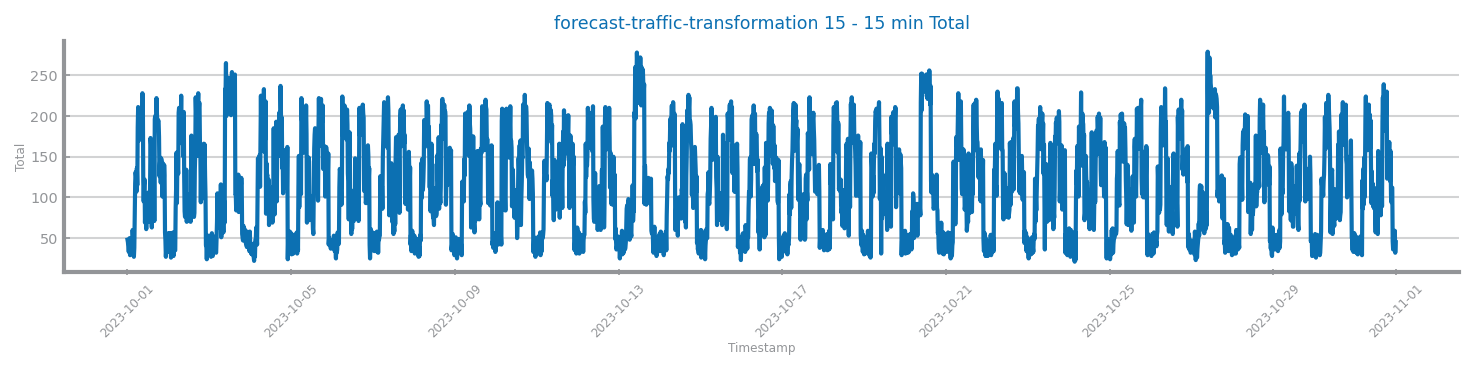

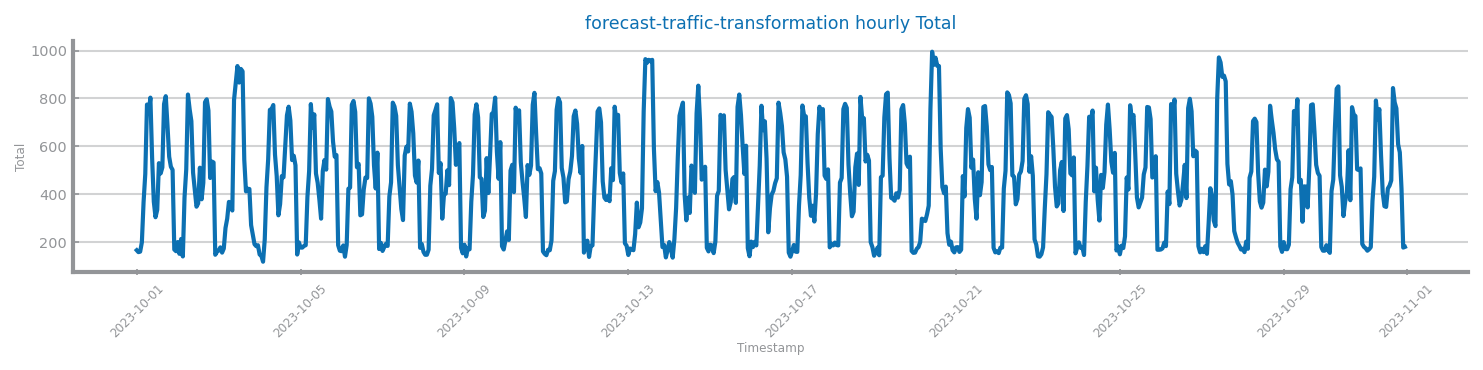

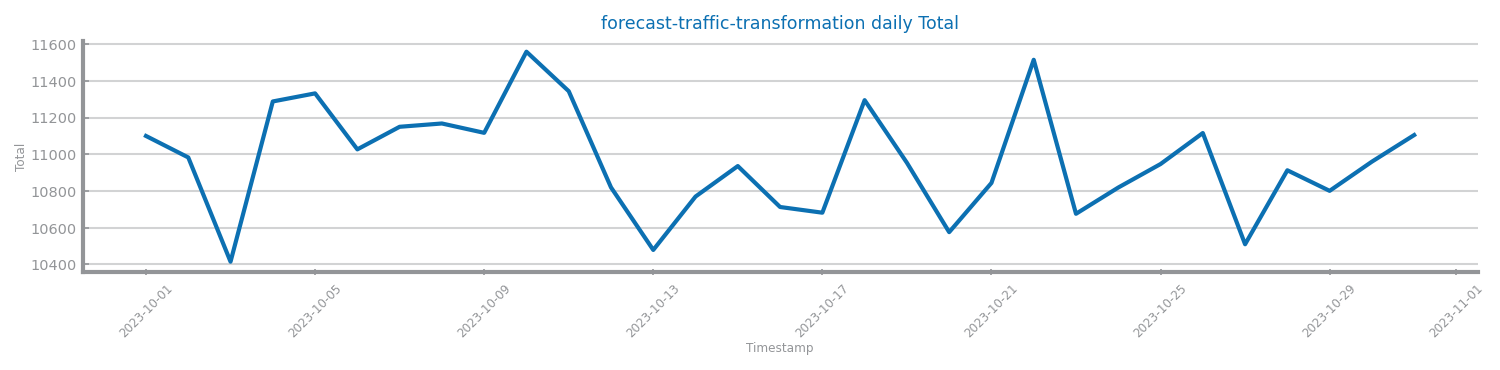

In [11]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} 15 - 15 min {target}",
)
savefig(f"images/forecast/{file_tag}_agg_total.png")
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg_h: Series = ts_aggregation_by(series, gran_level="H", agg_func="sum")
ss_agg_h_df: DataFrame = ts_aggregation_by(data, gran_level="H", agg_func="sum")

plot_line_chart(
    ss_agg_h.index.to_list(),
    ss_agg_h.to_list(),
    xlabel=ss_agg_h.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)

savefig(f"images/forecast/{file_tag}_agg_hourly.png")
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg_d: Series = ts_aggregation_by(series, gran_level="D", agg_func="sum")
ss_agg_d_df: DataFrame = ts_aggregation_by(data, gran_level="D", agg_func="sum")
plot_line_chart(
    ss_agg_d.index.to_list(),
    ss_agg_d.to_list(),
    xlabel=ss_agg_d.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
savefig(f"images/forecast/{file_tag}_agg_daily.png")
show()

Linear Regression Aggregation

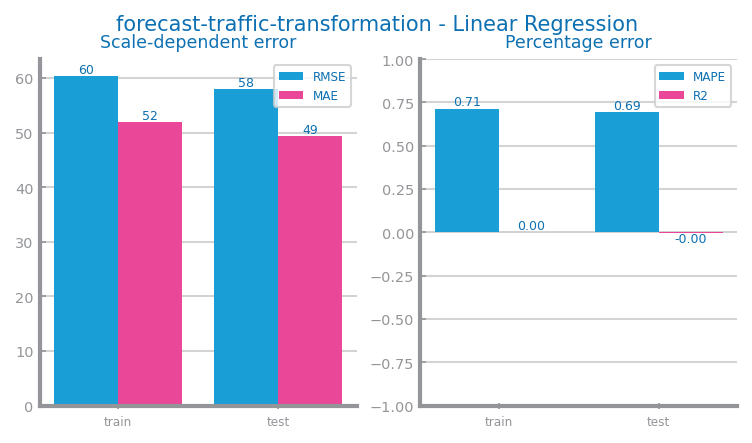

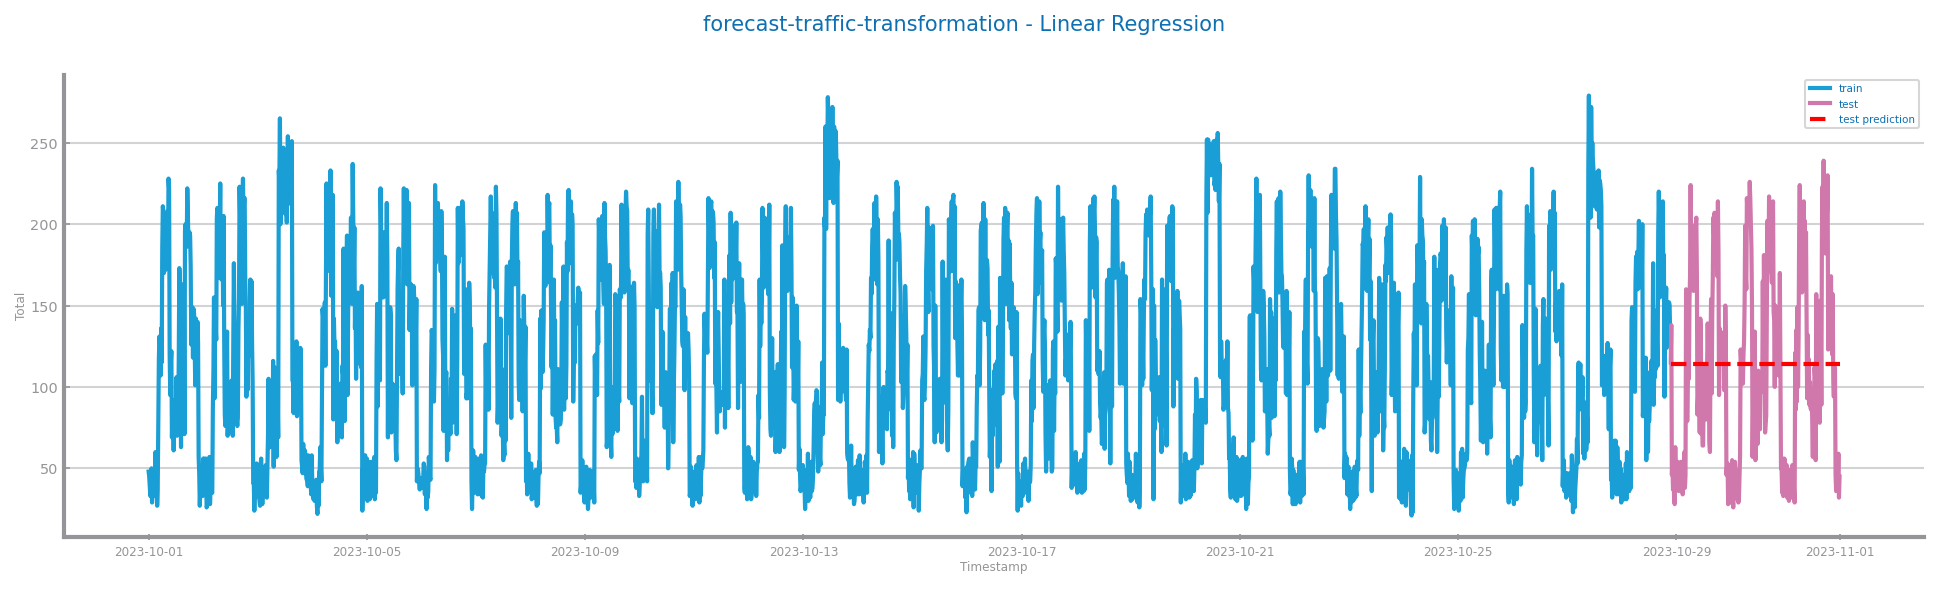

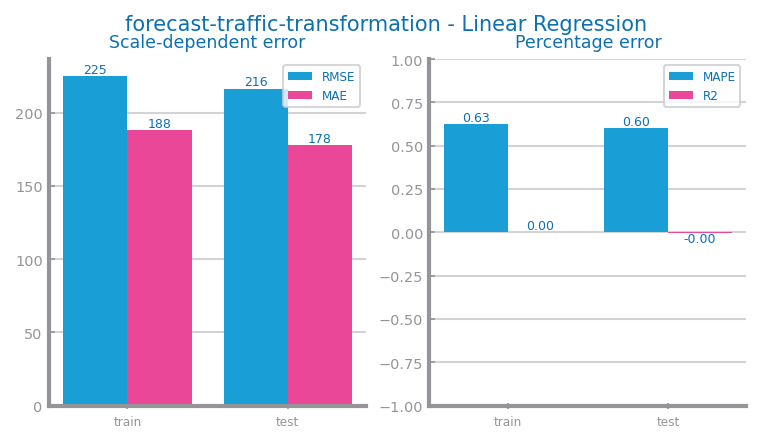

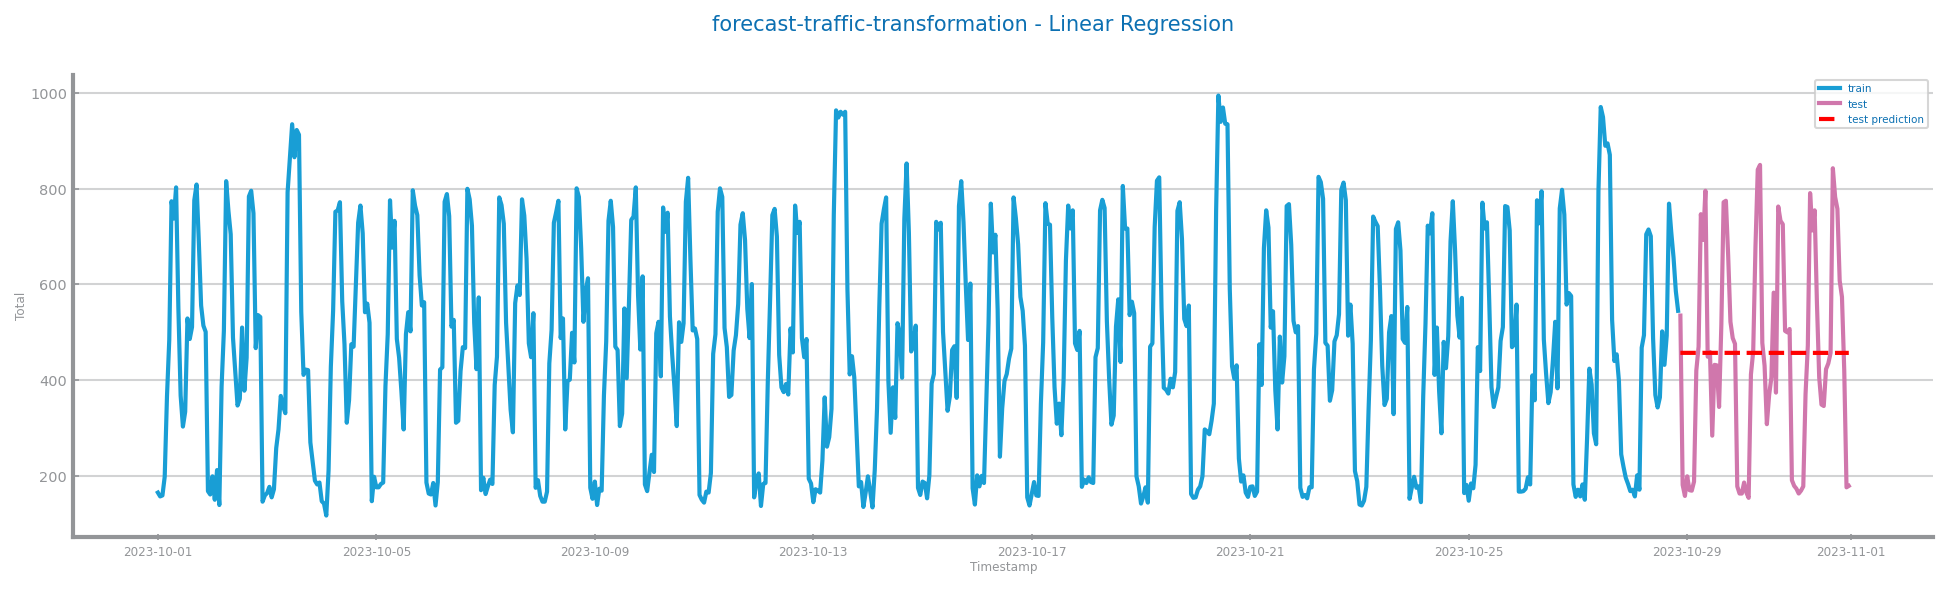

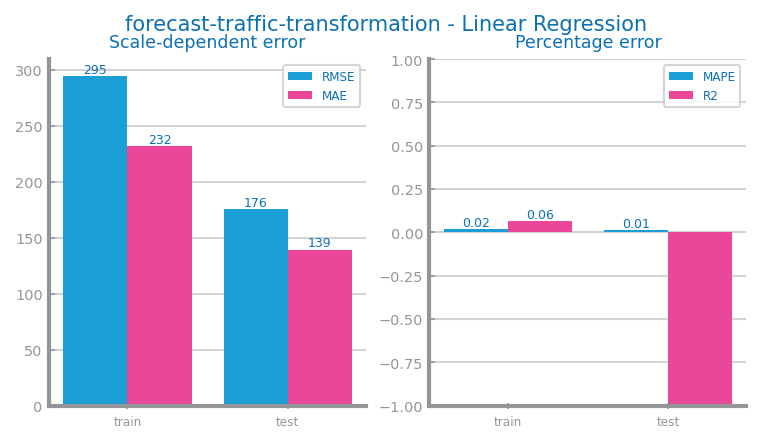

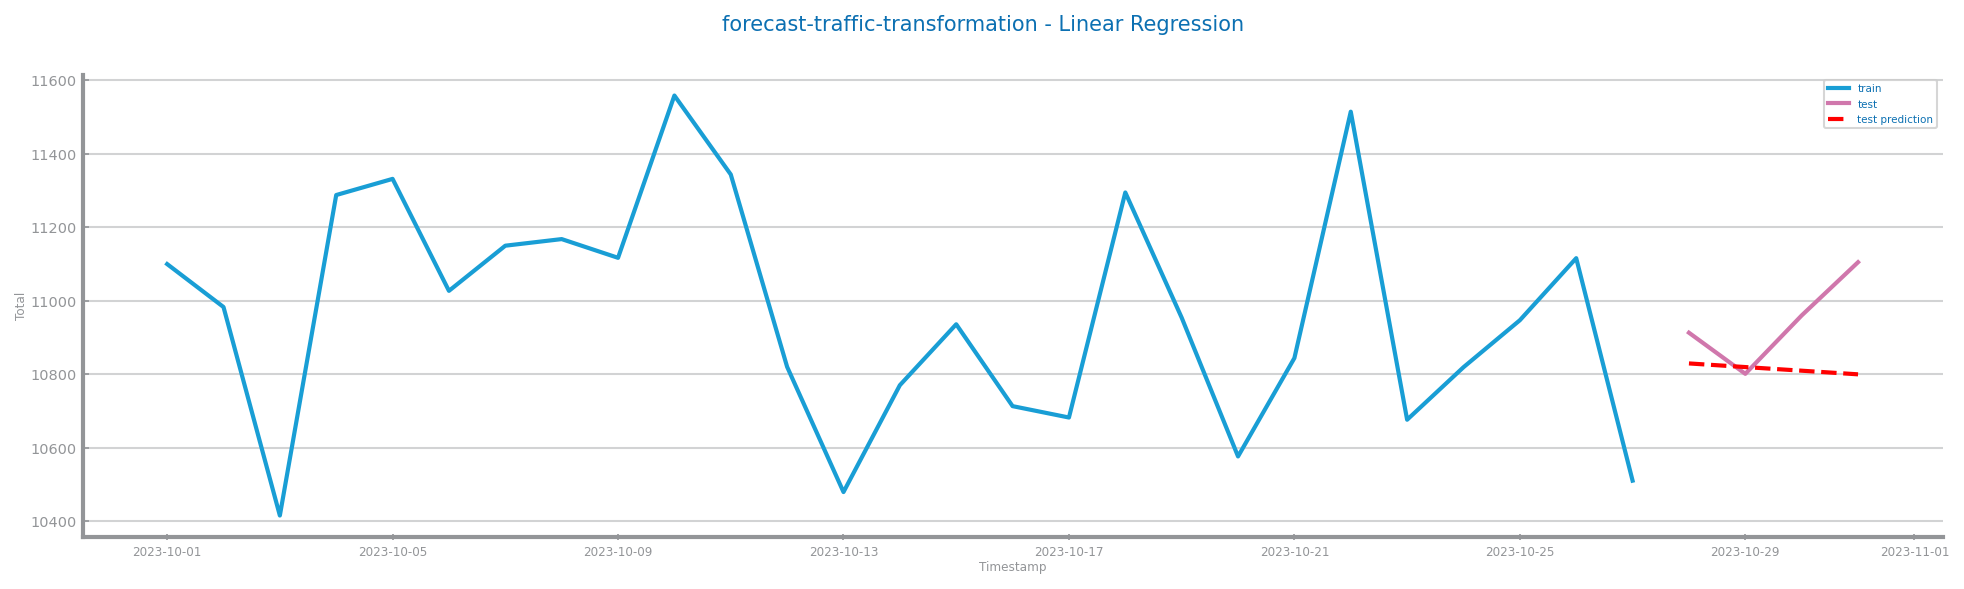

In [15]:
lst = [data, ss_agg_h_df, ss_agg_d_df]
names = ["15-15", "hour", "day"]
for i in range(len(lst)):
    d = lst[i]
    train, test = series_train_test_split(d, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(d)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
    savefig(f"images/forecast/{file_tag}_linear_regression_eval_aggregation_{names[i]}.png")

    from dslabs_functions import plot_forecasting_series

    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag} - Linear Regression",
        xlabel=index,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_linear_regression_forecast_aggregation_{names[i]}.png")


SMOOTHING

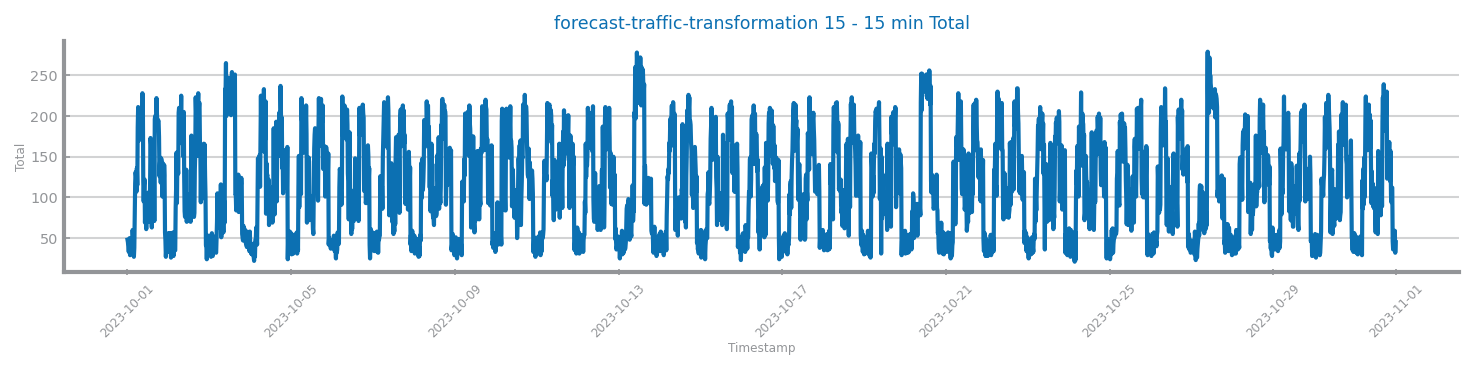

In [8]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} 15 - 15 min {target}",
)
show()


ss_smooth_5 : DataFrame = data.rolling(window=5).mean()
ss_smooth_10 : DataFrame = data.rolling(window=10).mean()
ss_smooth_25 : DataFrame = data.rolling(window=25).mean()
ss_smooth_50 : DataFrame = data.rolling(window=50).mean()

ss_smooth_75 : DataFrame = data.rolling(window=75).mean()
ss_smooth_100: DataFrame = data.rolling(window=100).mean()
ss_smooth_5 = ss_smooth_5.dropna()
ss_smooth_10 = ss_smooth_10.dropna()
ss_smooth_25 = ss_smooth_25.dropna()
ss_smooth_50 = ss_smooth_50.dropna()
ss_smooth_75 = ss_smooth_75.dropna()
ss_smooth_100 = ss_smooth_100.dropna()
common_index = ss_smooth_5.index.intersection(ss_smooth_100.index)
ss_smooth_5 = ss_smooth_5.loc[common_index]
ss_smooth_10 = ss_smooth_10.loc[common_index]
ss_smooth_25 = ss_smooth_25.loc[common_index]
ss_smooth_50 = ss_smooth_50.loc[common_index]
ss_smooth_75 = ss_smooth_75.loc[common_index]
ss_smooth_100 = ss_smooth_100.loc[common_index]


datas = [ss_smooth_5,ss_smooth_10,ss_smooth_25,ss_smooth_50, ss_smooth_75, ss_smooth_100]
names = ["5","10","25","50", "75", "100"]

show()

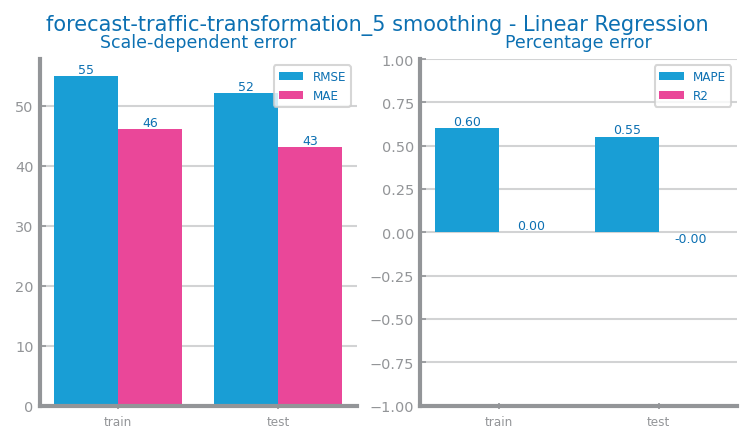

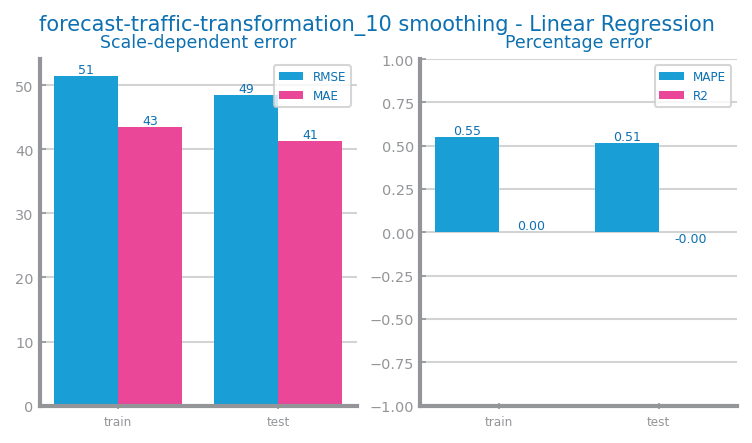

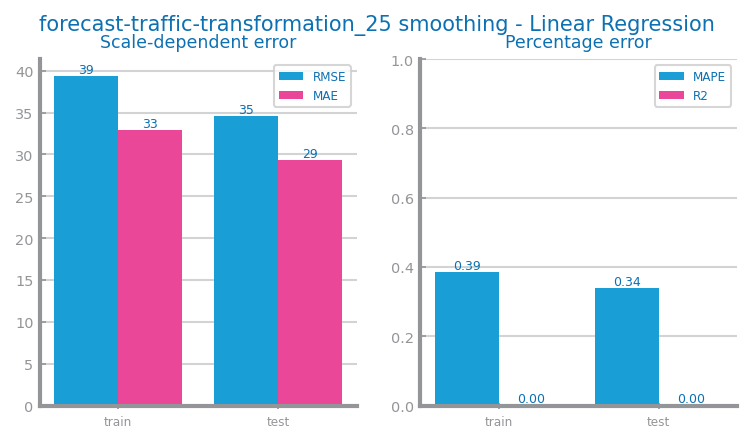

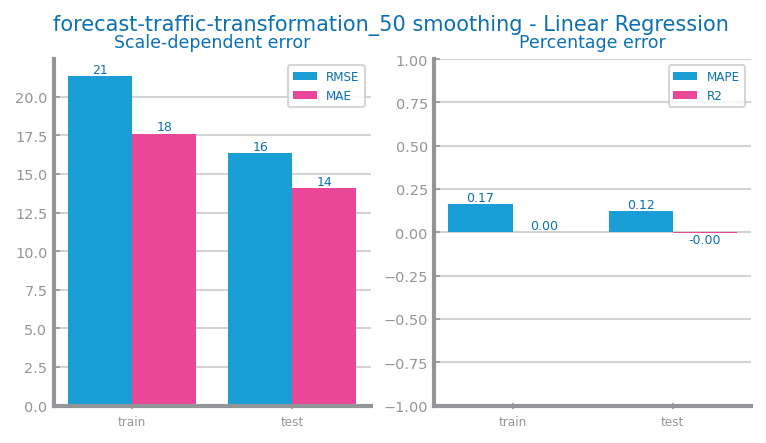

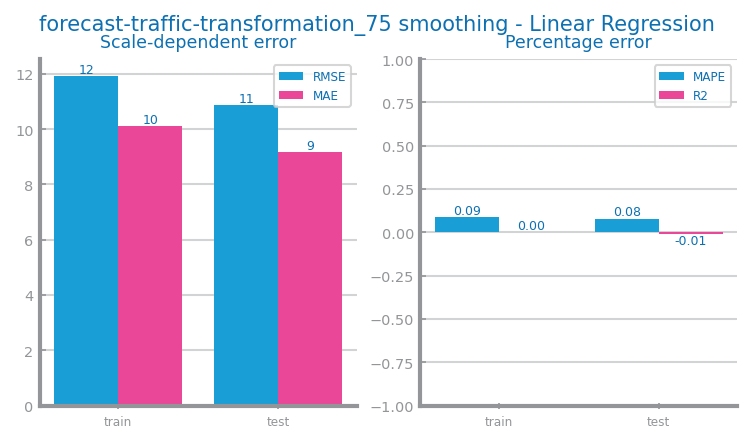

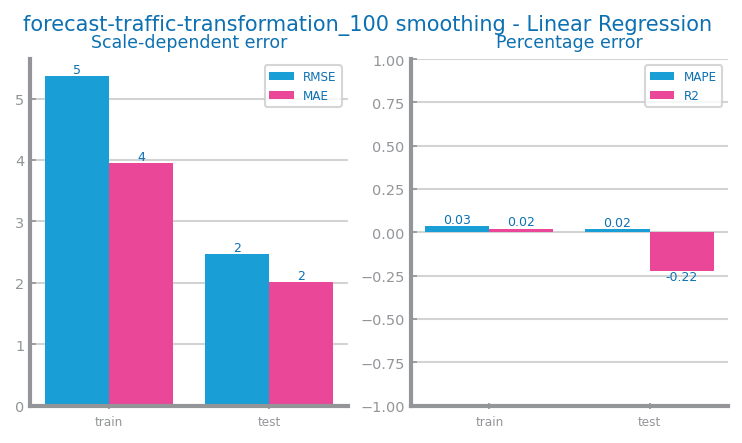

In [21]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} smoothing - Linear Regression")
    
    savefig(f"images/forecast/{file_tag}_linear_regression_forecast_smoothing_win_size_{name}.png")

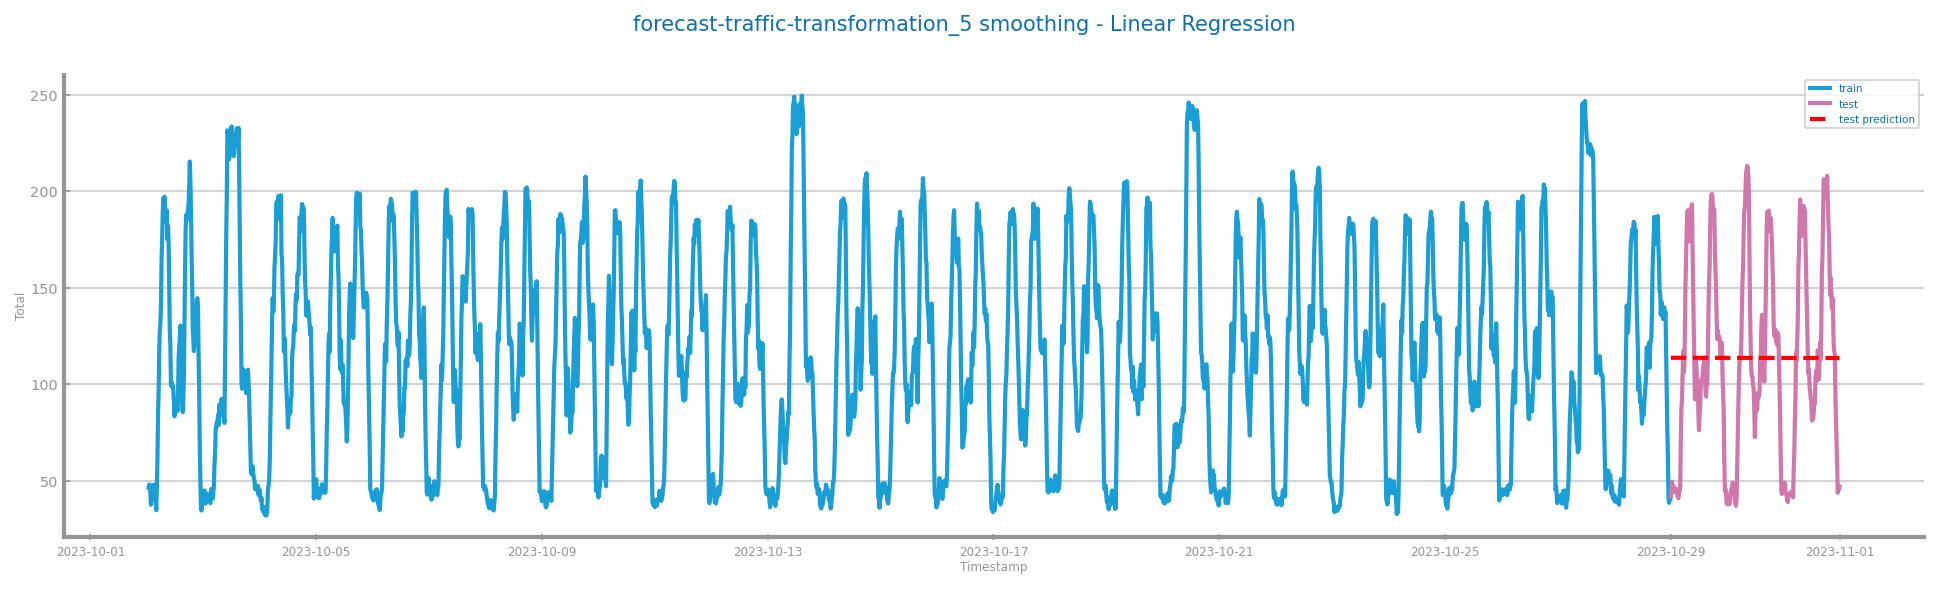

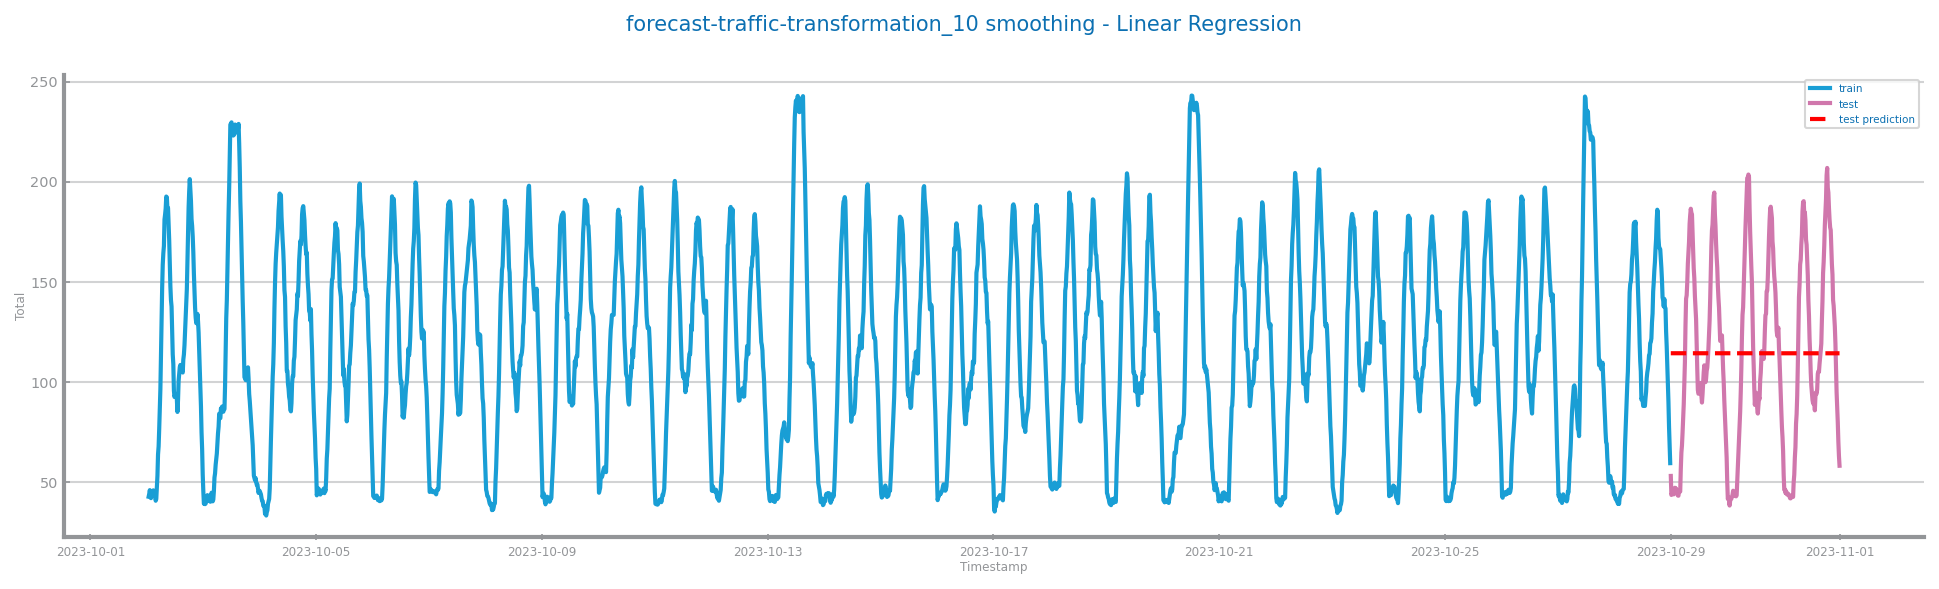

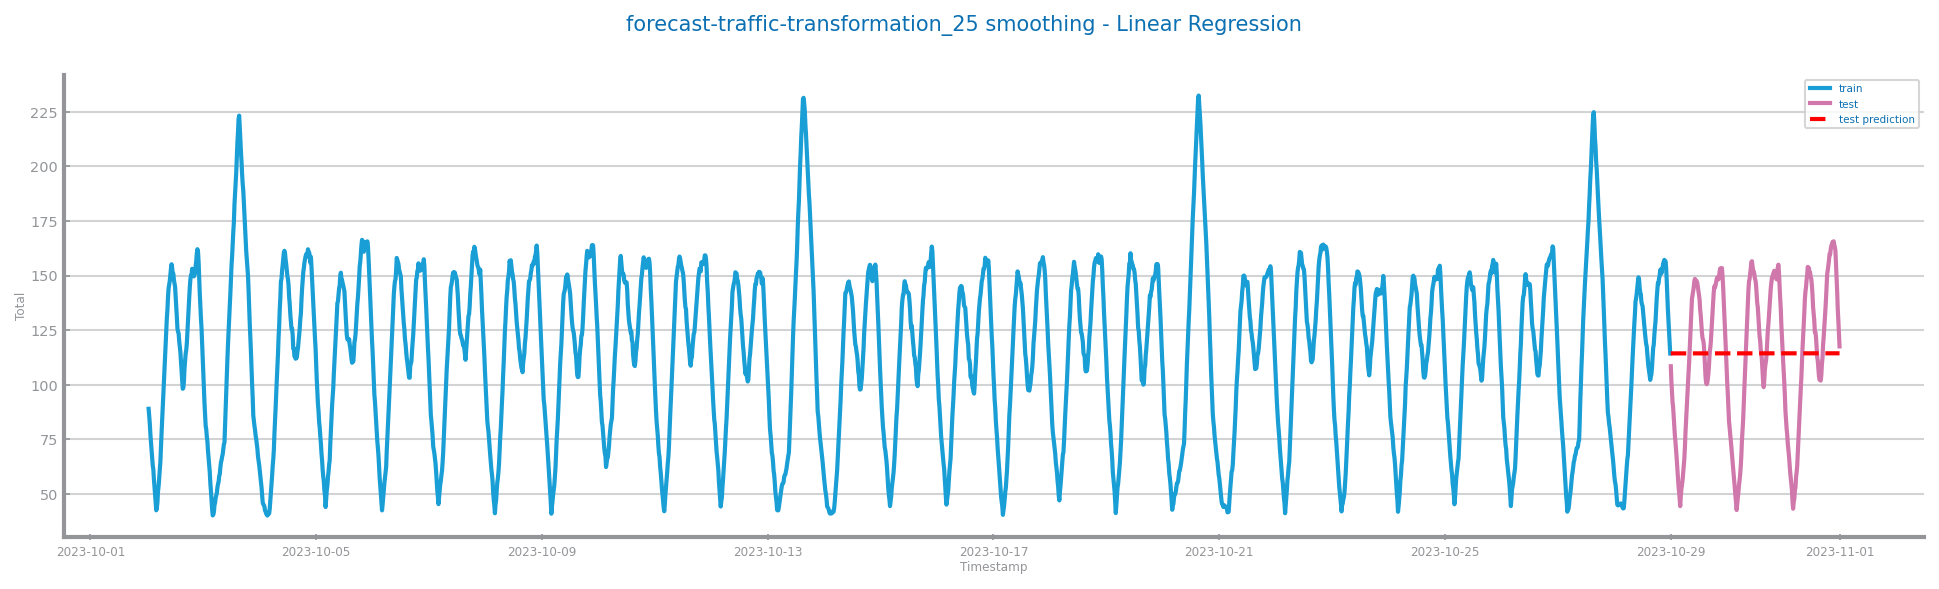

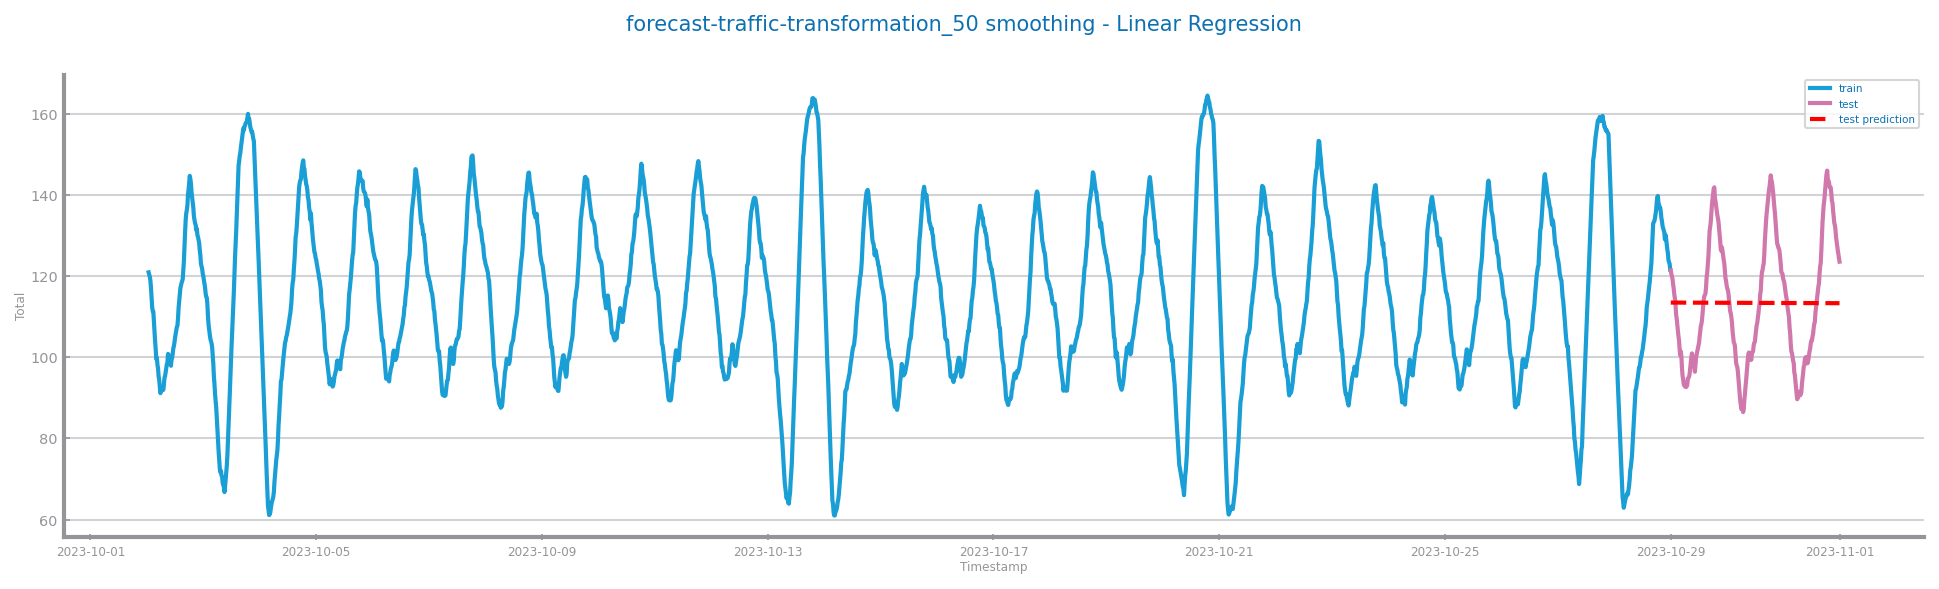

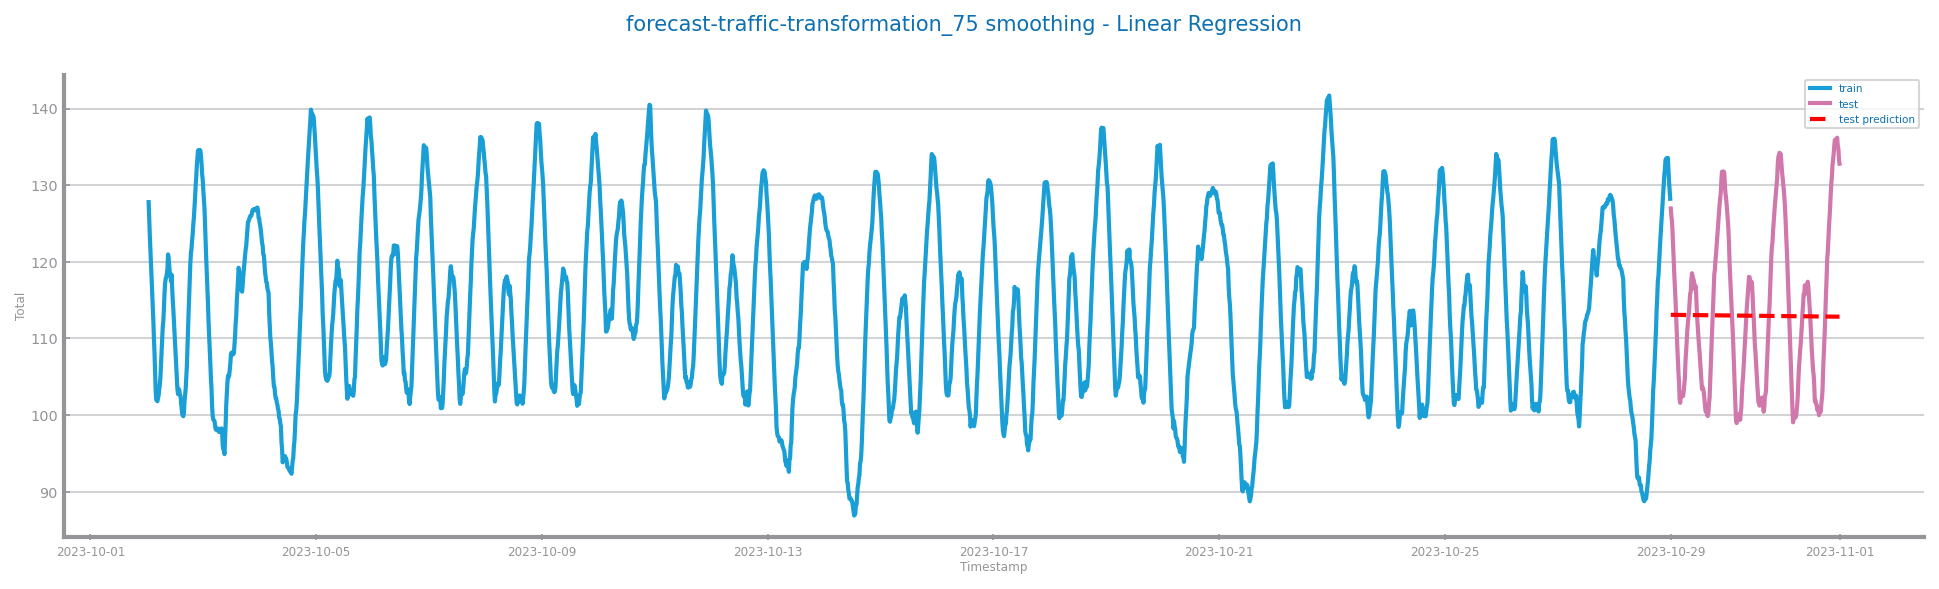

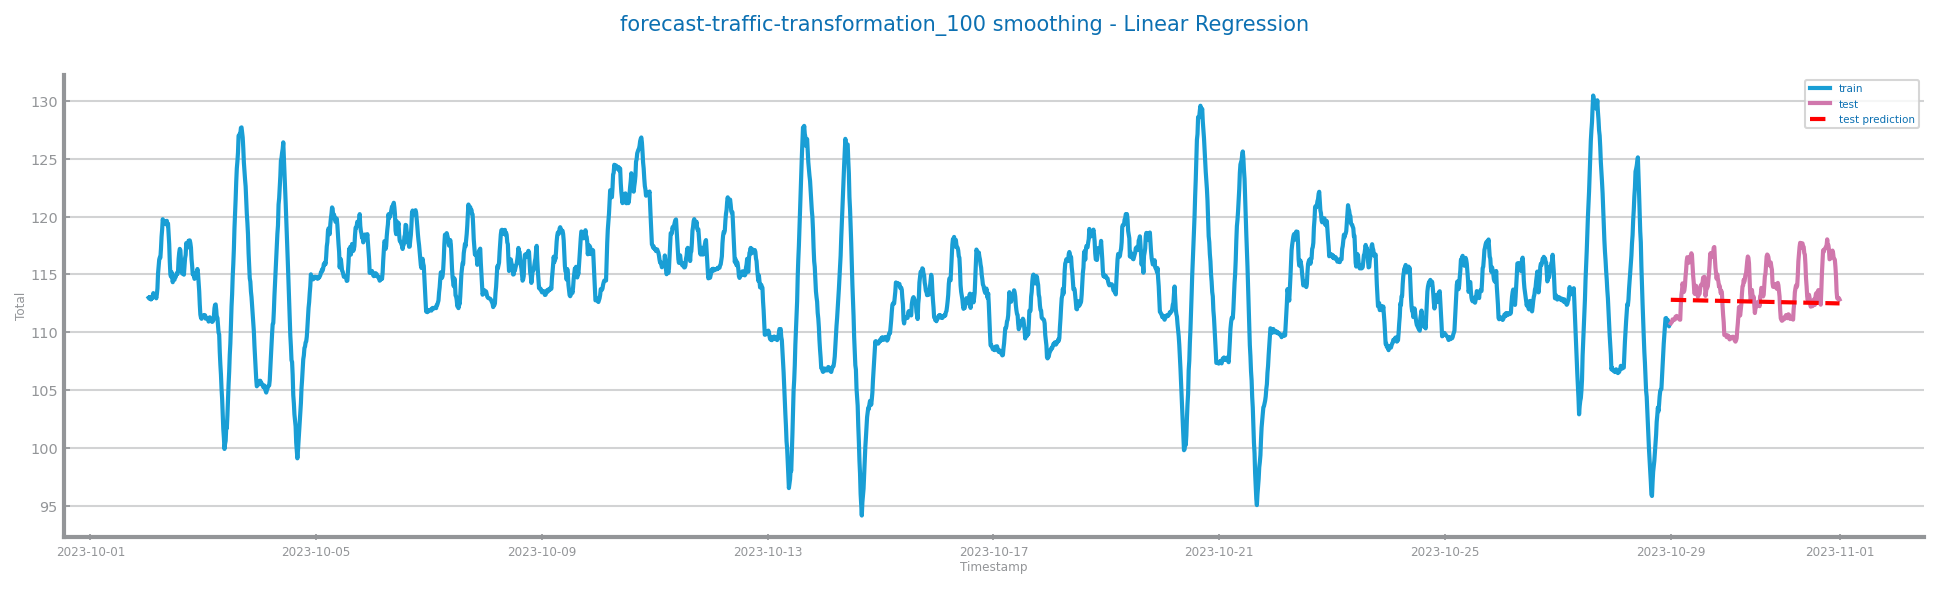

In [22]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_{name} smoothing - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_smoothing_linear_regression_forecast.png")

Differentiation

In [9]:
data = ss_smooth_100
ss_diff_0 : DataFrame = data
ss_diff : DataFrame = data.diff()
ss_diff_2 : DataFrame = ss_diff.diff()
ss_diff = ss_diff.dropna()
ss_diff_2 = ss_diff_2.dropna()
common_index = ss_diff_2.index.intersection(ss_diff_0.index)
ss_diff_0 = ss_diff_0.loc[common_index]
ss_diff = ss_diff.loc[common_index]
datas = [ss_diff_0,ss_diff,ss_diff_2]
names = ["0","1","2"]

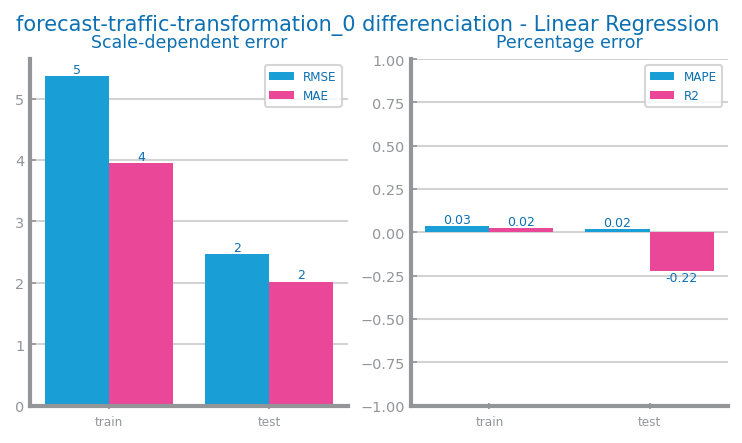

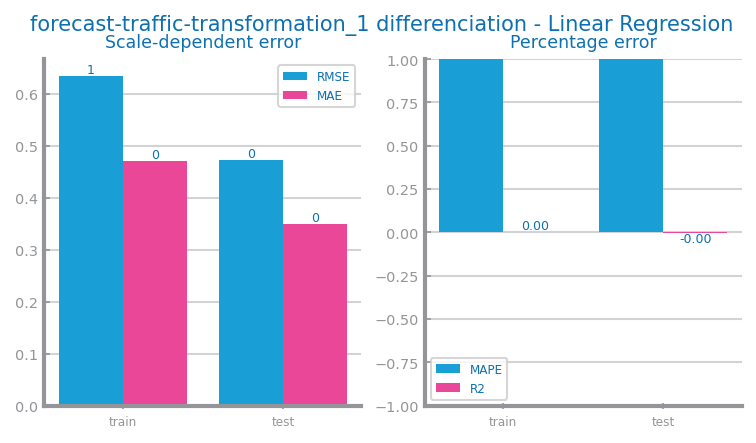

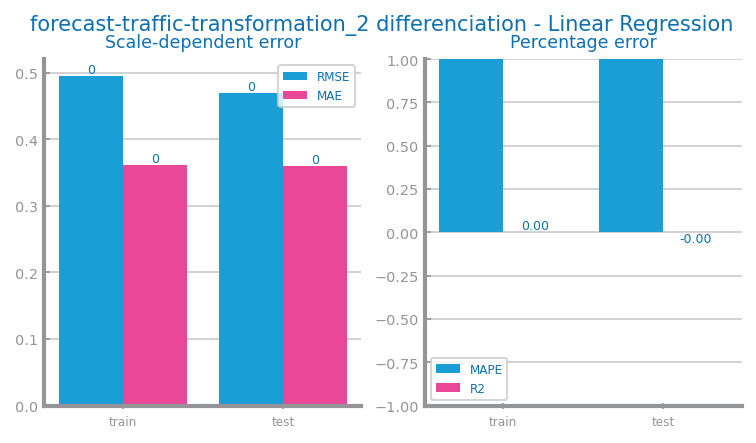

In [31]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} differenciation - Linear Regression")
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_differentiation_linear_regression_eval.png")

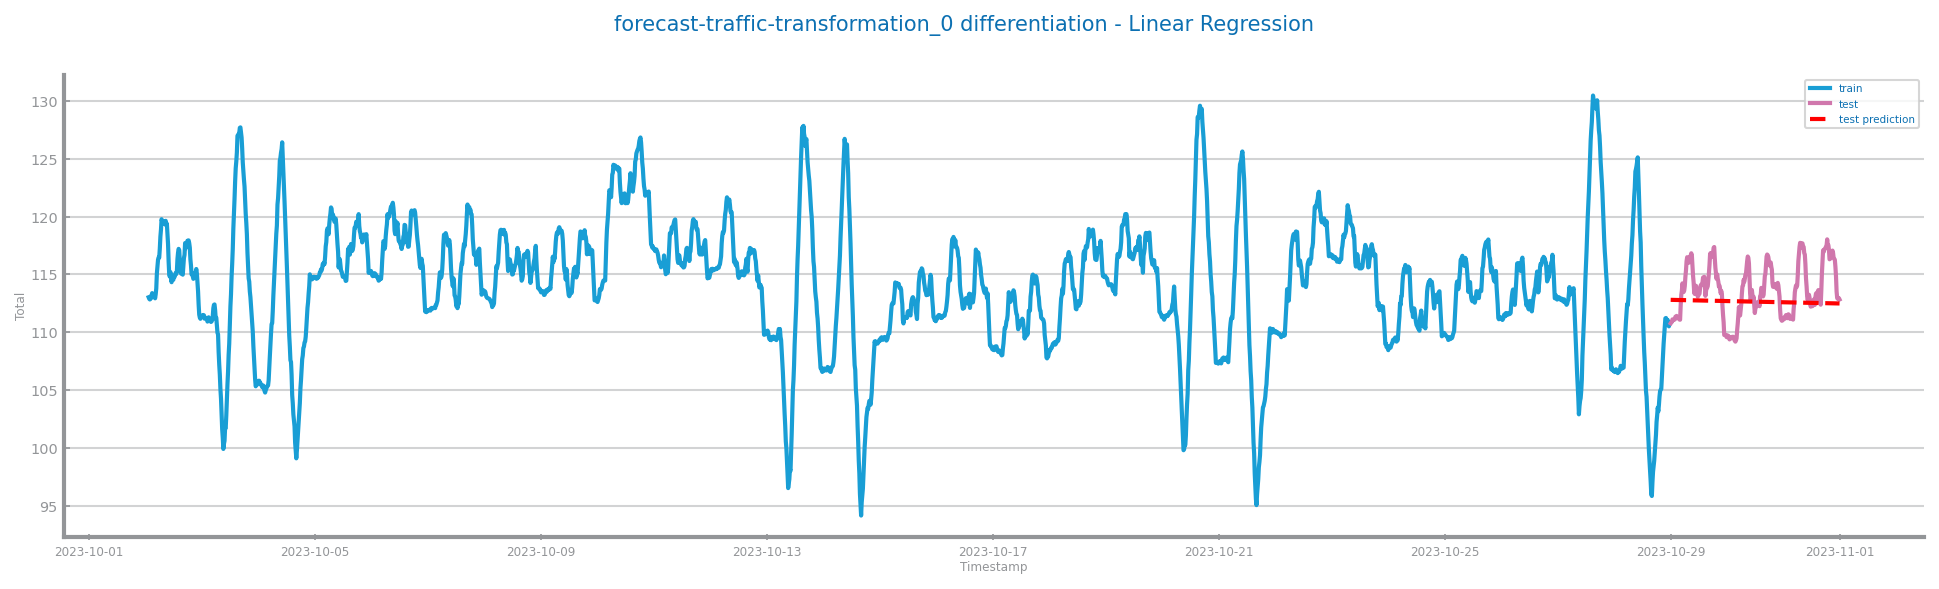

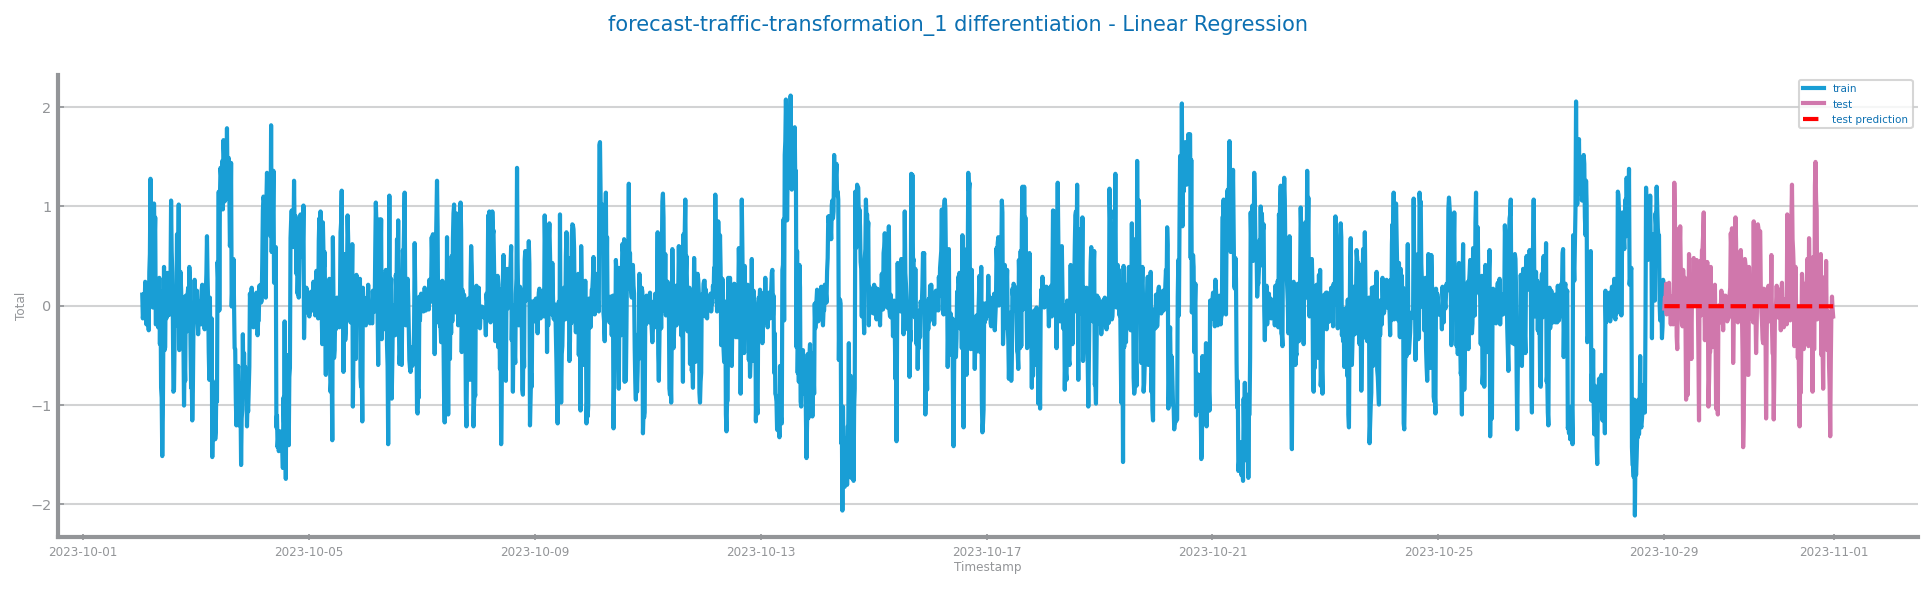

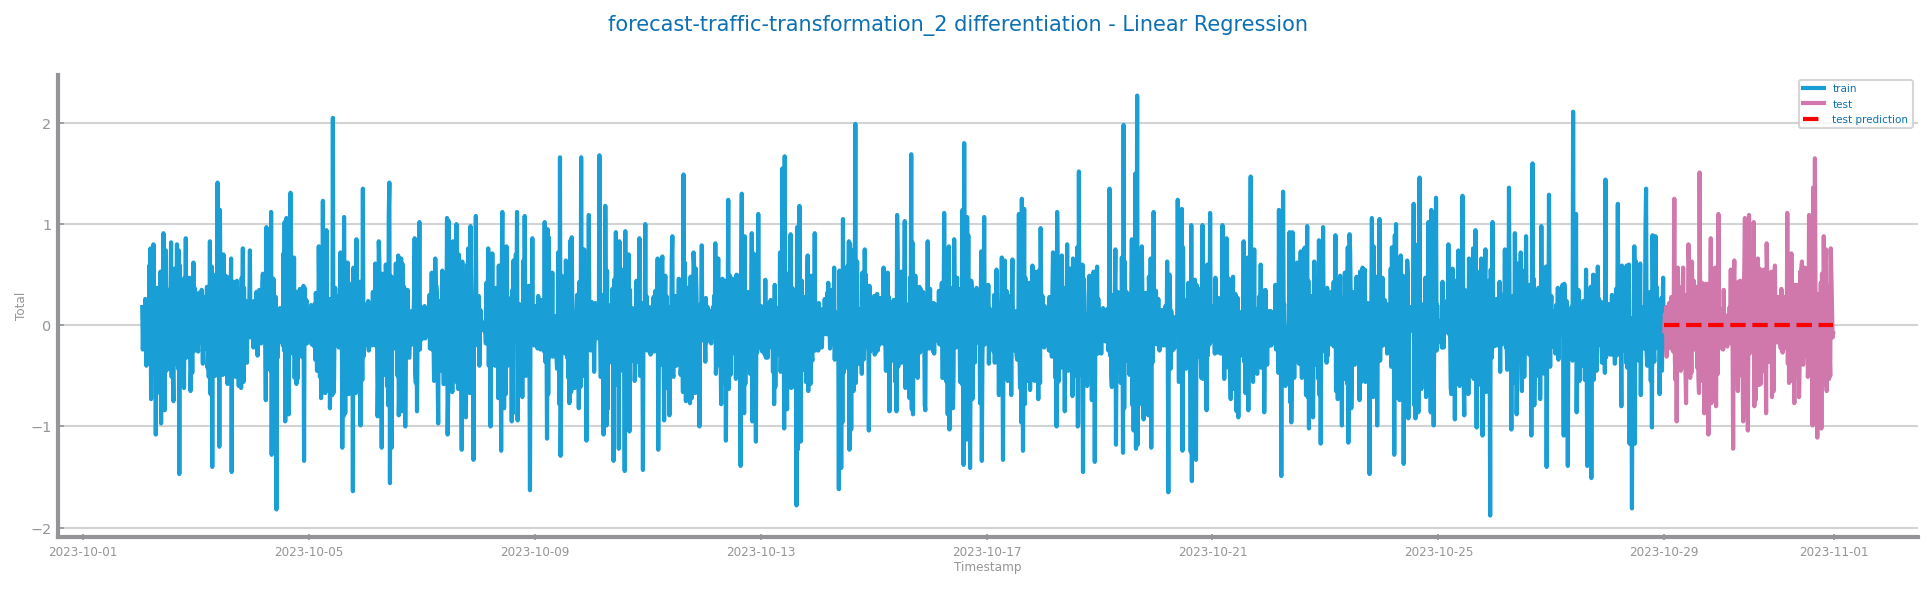

In [32]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_{name} differentiation - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_differentiation_linear_regression_forecast.png")

FORECASTING WITH SMOOTHING 100 ONLY

EVALUATION - Simple Average

In [1]:
from pandas import Series


def series_train_test_split(data: Series, trn_pct: float = 0.90) -> tuple[Series, Series]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: Series = data.copy()
    train: Series = df_cp.iloc[:trn_size, :]
    test: Series = df_cp.iloc[trn_size:]
    return train, test



In [3]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, savefig
from dslabs_functions import PAST_COLOR, FUTURE_COLOR, PRED_FUTURE_COLOR, HEIGHT


def plot_forecasting_series(
    trn: Series,
    tst: Series,
    prd_tst: Series,
    title: str = "",
    xlabel: str = "time",
    ylabel: str = "",
) -> list[Axes]:
    fig, ax = subplots(1, 1, figsize=(4 * HEIGHT, HEIGHT), squeeze=True)
    fig.suptitle(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(trn.index, trn.values, label="train", color=PAST_COLOR)
    ax.plot(tst.index, tst.values, label="test", color=FUTURE_COLOR)
    ax.plot(prd_tst.index, prd_tst.values, "--", label="test prediction", color=PRED_FUTURE_COLOR)
    ax.legend(prop={"size": 5})

    return ax

In [4]:
from math import sqrt
from dslabs_functions import plot_multibar_chart, FORECAST_MEASURES


def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list[Axes]:
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # print(eval1, eval2)
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)
    return axs

In [5]:
from sklearn.base import RegressorMixin


class SimpleAvgRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.mean: float = 0.0
        return

    def fit(self, X: Series):
        self.mean = X.mean()
        return

    def predict(self, X: Series) -> Series:
        prd: list = len(X) * [self.mean]
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

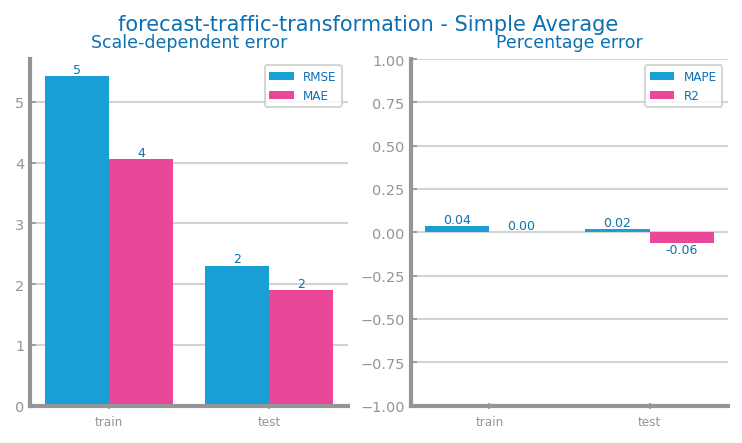

In [10]:
from pandas import read_csv, DataFrame, Series


train, test = series_train_test_split(data, trn_pct=0.90)

fr_mod = SimpleAvgRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Simple Average")
savefig(f"images/forecast//{file_tag}_simpleAvg_eval.png")

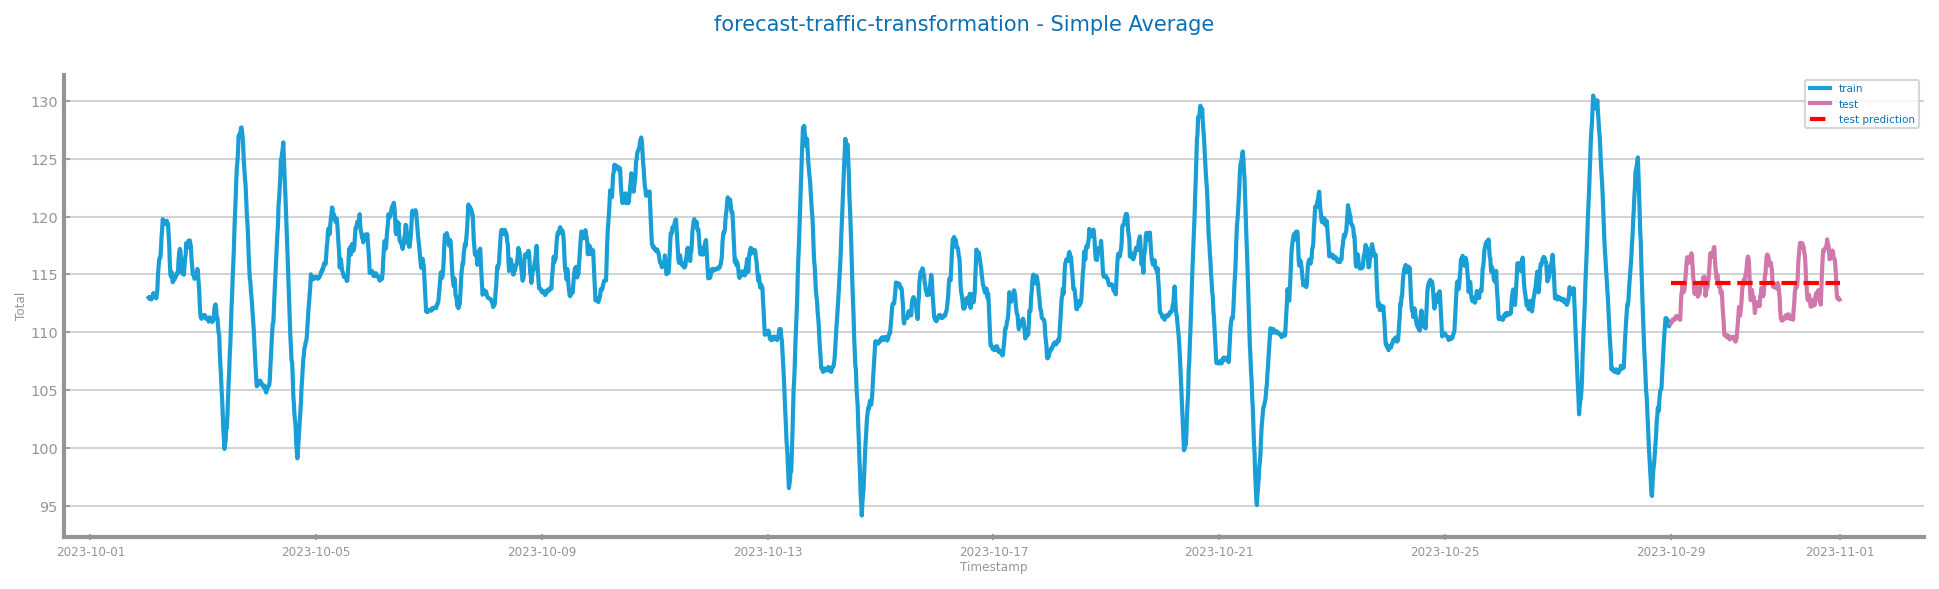

In [11]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Simple Average",
    xlabel=index,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_simpleAvg_forecast.png")

PERSISTENCE

In [12]:
from pandas import Series
from sklearn.base import RegressorMixin


class PersistenceOptimistRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.last: float = 0.0
        return

    def fit(self, X: Series):
        self.last = X.iloc[-1]
        # print(self.last)
        return

    def predict(self, X: Series):
        prd: list = X.shift().values.ravel()
        prd[0] = self.last
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

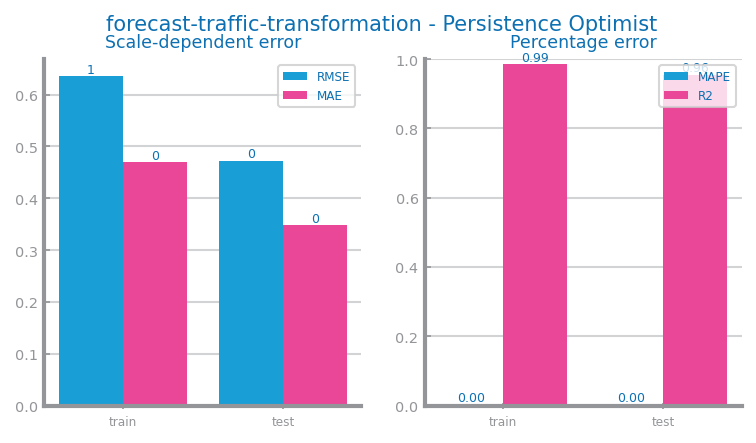

In [14]:
train, test = series_train_test_split(data, trn_pct=0.90)

fr_mod = PersistenceOptimistRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Persistence Optimist")
savefig(f"images/forecast/{file_tag}_persistence_optim_eval.png")

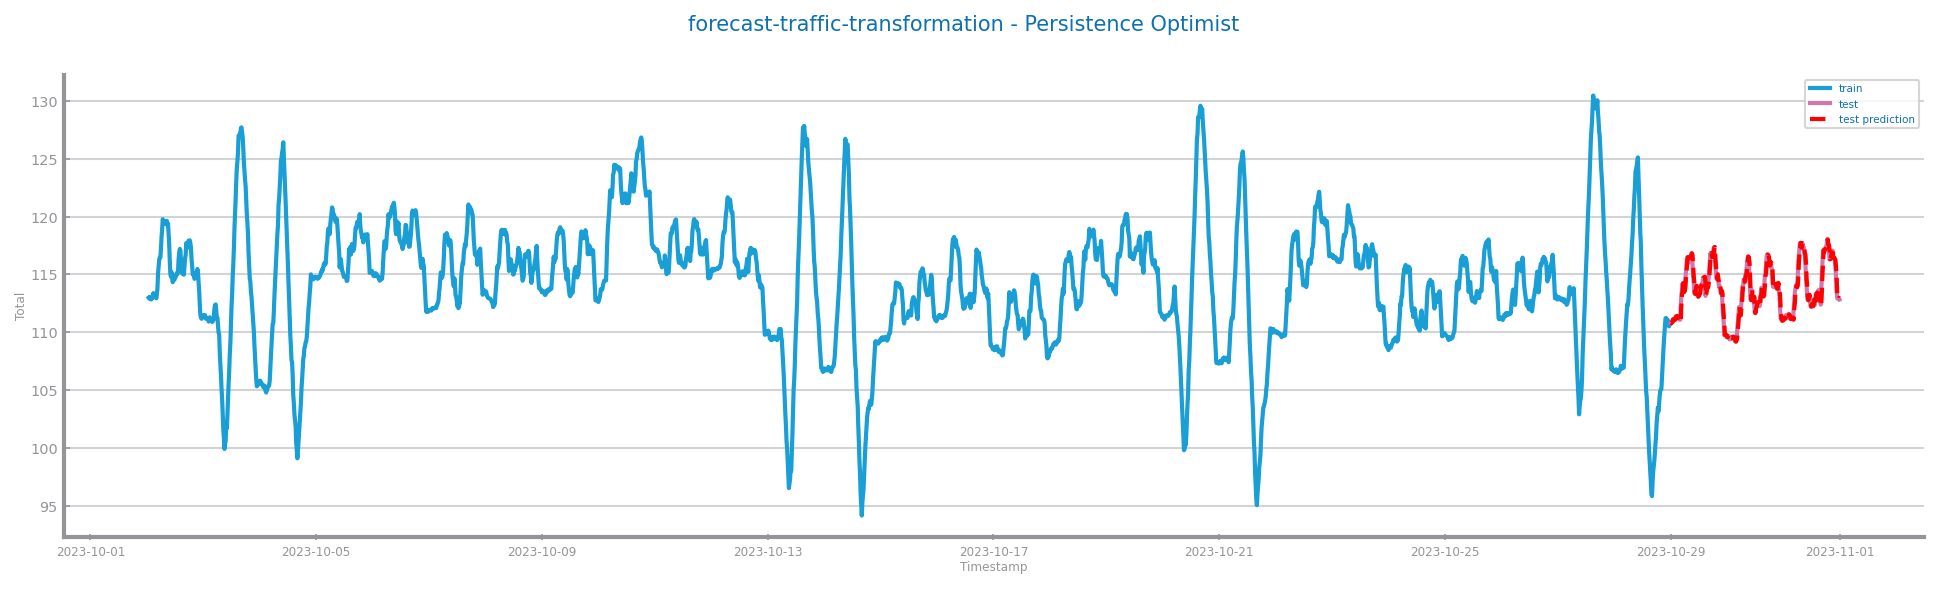

In [15]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Persistence Optimist",
    xlabel=index,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_persistence_optim_forecast.png")

In [16]:
class PersistenceRealistRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.last = 0
        self.estimations = [0]
        self.obs_len = 0

    def fit(self, X: Series):
        for i in range(1, len(X)):
            self.estimations.append(X.iloc[i - 1])
        self.obs_len = len(self.estimations)
        self.last = X.iloc[len(X) - 1]
        prd_series: Series = Series(self.estimations)
        prd_series.index = X.index
        return prd_series

    def predict(self, X: Series):
        prd: list = len(X) * [self.last]
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

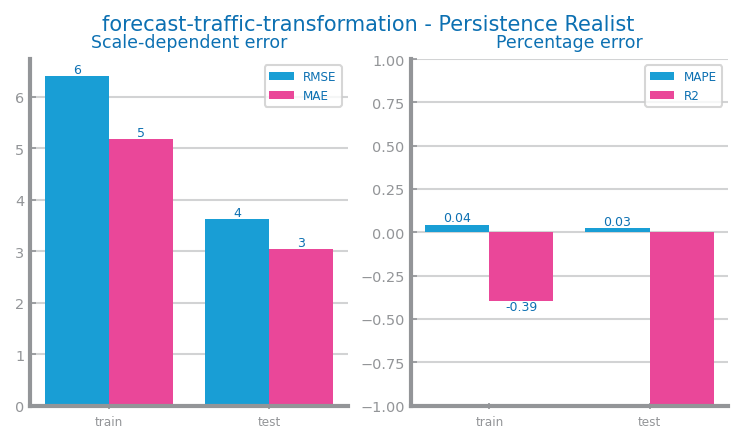

In [17]:
fr_mod = PersistenceRealistRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Persistence Realist")
savefig(f"images/forecast/{file_tag}_persistence_real_eval.png")

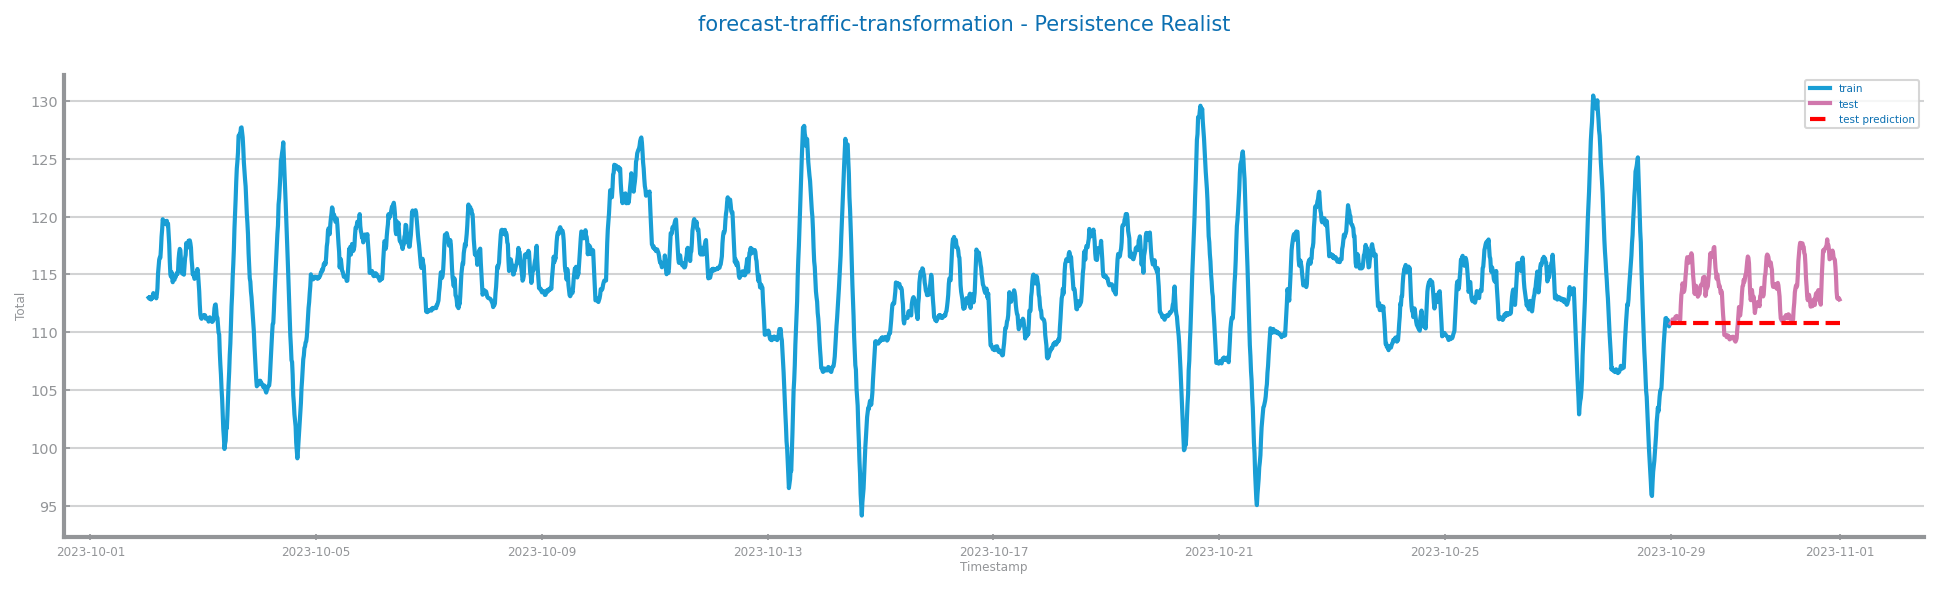

In [19]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Persistence Realist",
    xlabel=index,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_persistence_real_forecast.png")

ROLLING MEAN

In [20]:
from numpy import mean
from pandas import Series
from sklearn.base import RegressorMixin


class RollingMeanRegressor(RegressorMixin):
    def __init__(self, win: int = 3):
        super().__init__()
        self.win_size = win
        self.memory: list = []

    def fit(self, X: Series):
        self.memory = X.iloc[-self.win_size :]
        # print(self.memory)
        return

    def predict(self, X: Series):
        estimations = self.memory.tolist()
        for i in range(len(X)):
            new_value = mean(estimations[len(estimations) - self.win_size - i :])
            estimations.append(new_value)
        prd_series: Series = Series(estimations[self.win_size :])
        prd_series.index = X.index
        return prd_series

In [21]:
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_line_chart


def rolling_mean_study(train: Series, test: Series, measure: str = "R2"):
    # win_size = (3, 5, 10, 15, 20, 25, 30, 40, 50)
    win_size = (12, 24, 48, 96, 192, 384, 768)
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "Rolling Mean", "metric": measure, "params": ()}
    best_performance: float = -100000

    yvalues = []
    for w in win_size:
        pred = RollingMeanRegressor(win=w)
        pred.fit(train)
        prd_tst = pred.predict(test)

        eval: float = FORECAST_MEASURES[measure](test, prd_tst)
        # print(w, eval)
        if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
            best_performance: float = eval
            best_params["params"] = (w,)
            best_model = pred
        yvalues.append(eval)

    print(f"Rolling Mean best with win={best_params['params'][0]:.0f} -> {measure}={best_performance}")
    plot_line_chart(
        win_size, yvalues, title=f"Rolling Mean ({measure})", xlabel="window size", ylabel=measure, percentage=flag
    )

    return best_model, best_params

Rolling Mean best with win=768 -> R2=-0.0364451950729916


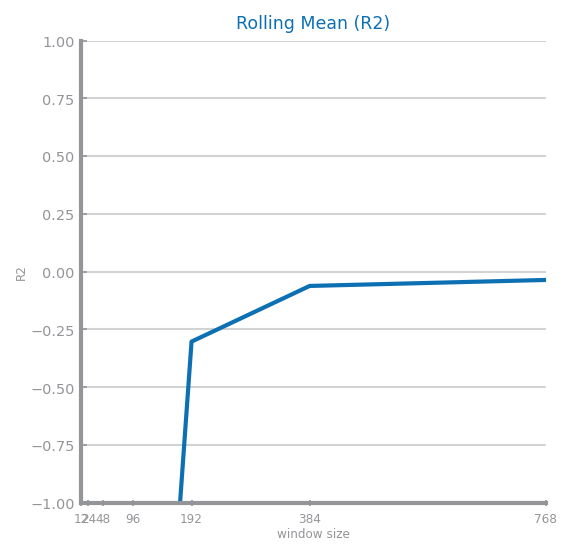

In [22]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, savefig
from dslabs_functions import series_train_test_split, HEIGHT

measure: str = "R2"


train, test = series_train_test_split(data, trn_pct=0.90)

fig = figure(figsize=(HEIGHT, HEIGHT))
best_model, best_params = rolling_mean_study(train, test)
savefig(f"images/forecast/{file_tag}_rollingmean_{measure}_study.png")

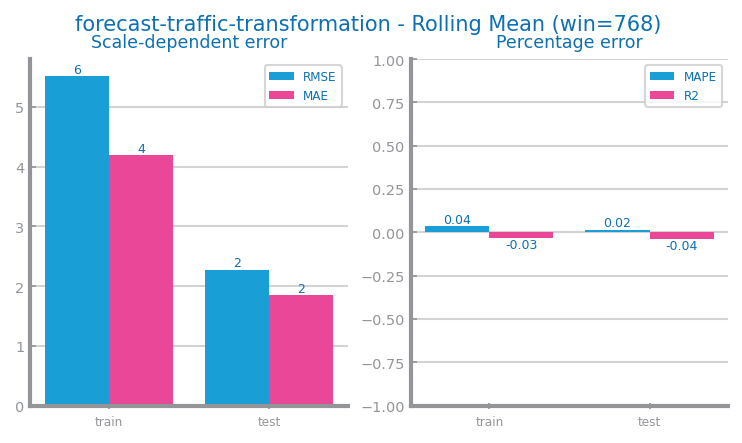

In [23]:
params = best_params["params"]
prd_trn: Series = best_model.predict(train)
prd_tst: Series = best_model.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Rolling Mean (win={params[0]})")
savefig(f"images/forecast/{file_tag}_rollingmean_{measure}_win{params[0]}_eval.png")

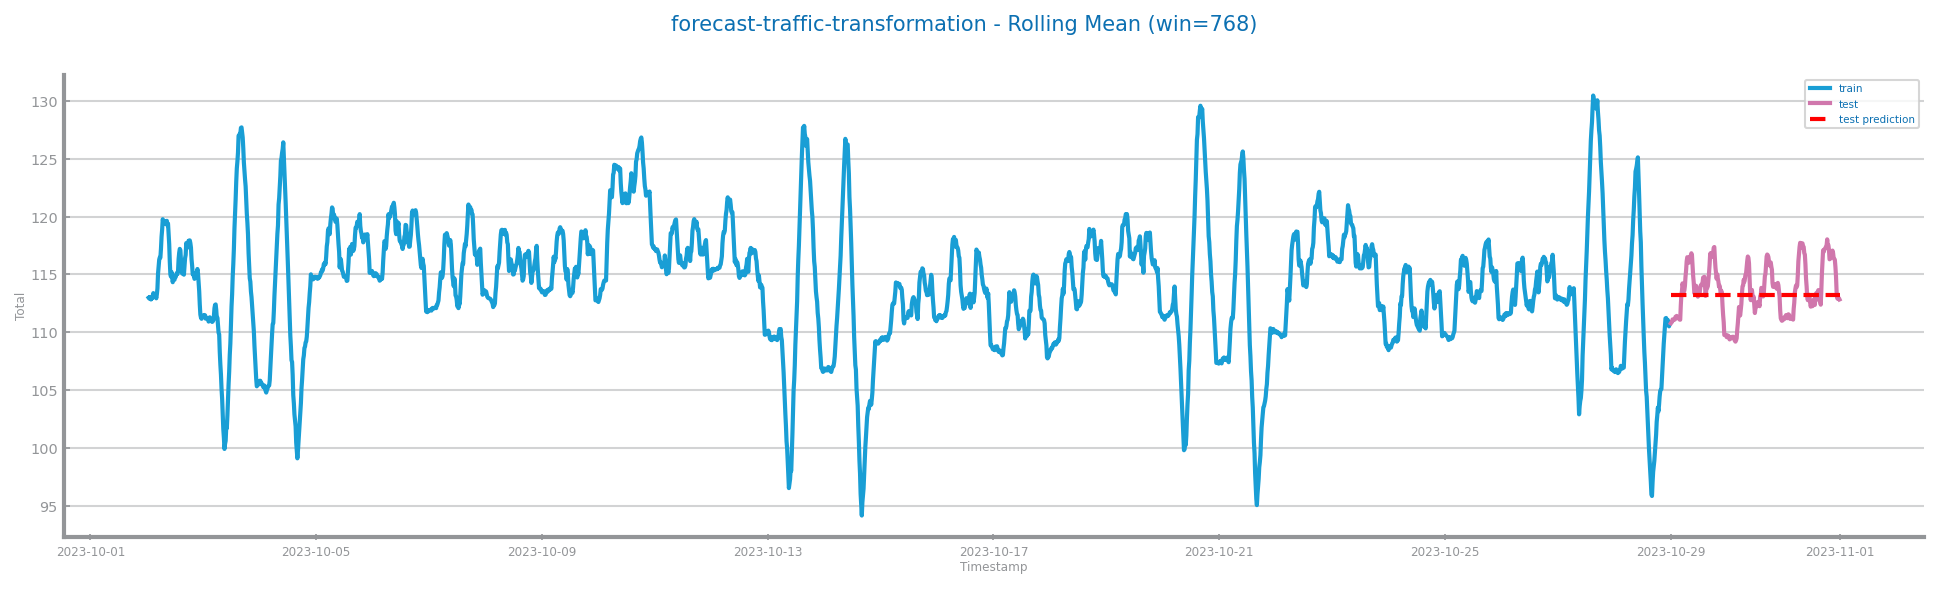

In [24]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Rolling Mean (win={params[0]})",
    xlabel=index,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_rollingmean_{measure}_forecast.png")

ARIMA

In [25]:
from pandas import read_csv, DataFrame, Series
from statsmodels.tsa.arima.model import ARIMA
from dslabs_functions import series_train_test_split, HEIGHT

measure: str = "R2"

train, test = series_train_test_split(data, trn_pct=0.90)

predictor = ARIMA(train, order=(3, 1, 2))
model = predictor.fit()
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 2589
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1587.340
Date:                Tue, 02 Jan 2024   AIC                           3186.680
Time:                        18:23:07   BIC                           3221.832
Sample:                    10-02-2023   HQIC                          3199.420
                         - 10-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2135      0.546      0.391      0.696      -0.856       1.284
ar.L2          0.6178      0.572      1.080      0.280      -0.503       1.739
ar.L3         -0.0542      0.106     -0.513      0.6

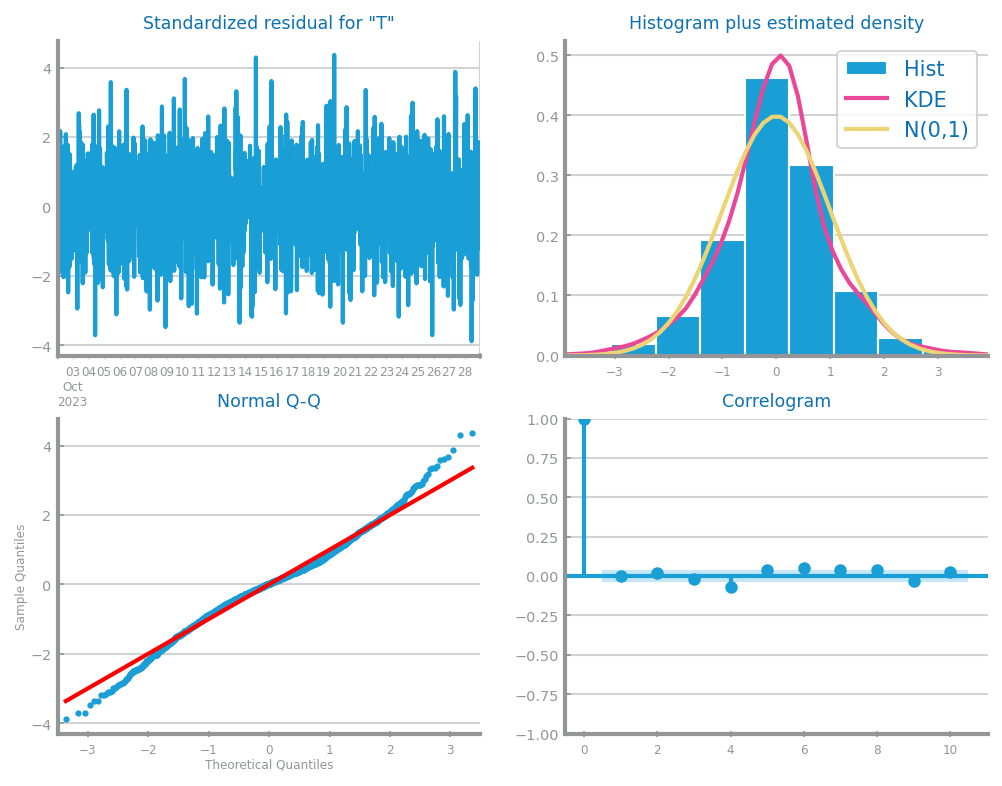

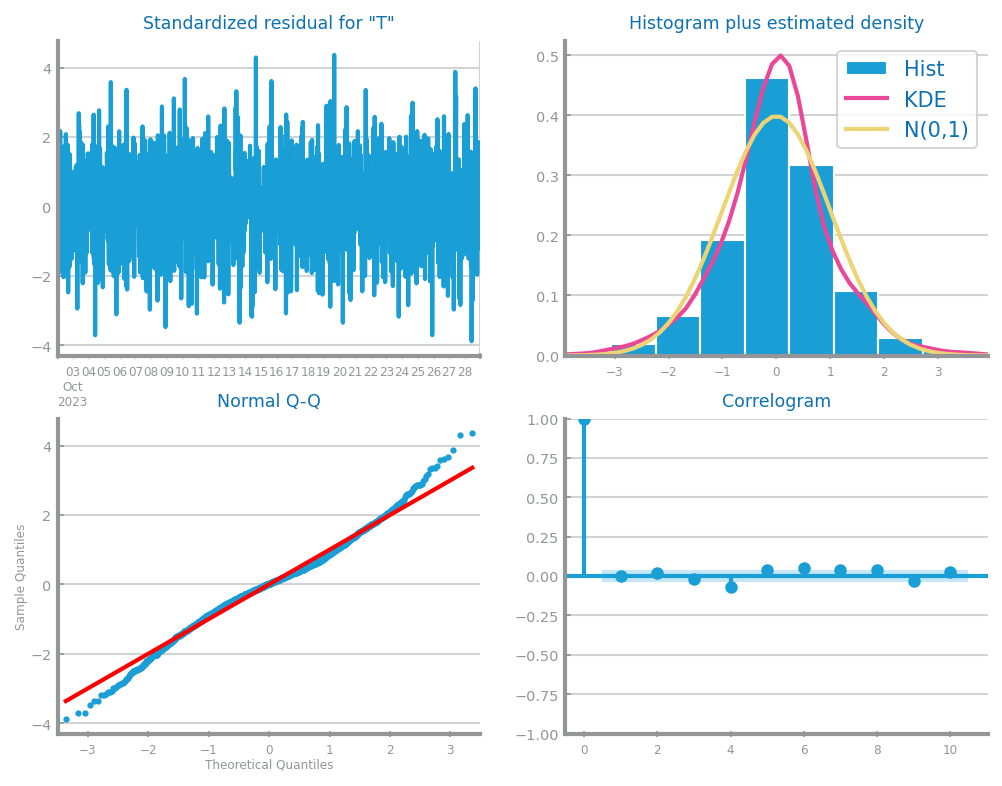

In [26]:
model.plot_diagnostics(figsize=(2 * HEIGHT, 1.5 * HEIGHT))

In [27]:
from matplotlib.pyplot import figure, savefig, subplots
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart


def arima_study(train: Series, test: Series, measure: str = "R2"):
    d_values = (0, 1, 2)
    p_params = (1, 2, 3, 5, 7, 10)
    q_params = (1, 3, 5, 7)

    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "ARIMA", "metric": measure, "params": ()}
    best_performance: float = -100000

    fig, axs = subplots(1, len(d_values), figsize=(len(d_values) * HEIGHT, HEIGHT))
    for i in range(len(d_values)):
        d: int = d_values[i]
        values = {}
        for q in q_params:
            yvalues = []
            for p in p_params:
                arima = ARIMA(train, order=(p, d, q))
                model = arima.fit()
                prd_tst = model.forecast(steps=len(test), signal_only=False)
                eval: float = FORECAST_MEASURES[measure](test, prd_tst)
                # print(f"ARIMA ({p}, {d}, {q})", eval)
                if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
                    best_performance: float = eval
                    best_params["params"] = (p, d, q)
                    best_model = model
                yvalues.append(eval)
            values[q] = yvalues
        plot_multiline_chart(
            p_params, values, ax=axs[i], title=f"ARIMA d={d} ({measure})", xlabel="p", ylabel=measure, percentage=flag
        )
    print(
        f"ARIMA best results achieved with (p,d,q)=({best_params['params'][0]:.0f}, {best_params['params'][1]:.0f}, {best_params['params'][2]:.0f}) ==> measure={best_performance:.2f}"
    )

    return best_model, best_params

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Pyth

ARIMA best results achieved with (p,d,q)=(2, 0, 1) ==> measure=0.04


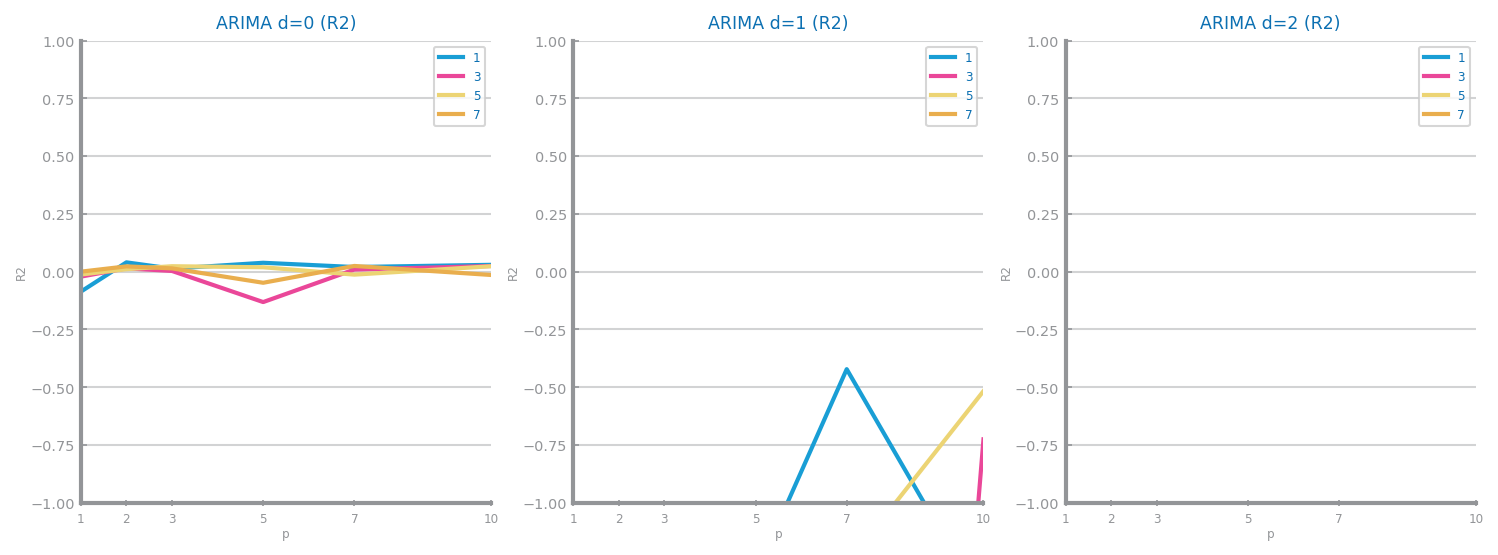

In [28]:
from matplotlib.pyplot import savefig

best_model, best_params = arima_study(train, test, measure=measure)
savefig(f"images/forecast/{file_tag}_arima_{measure}_study.png")

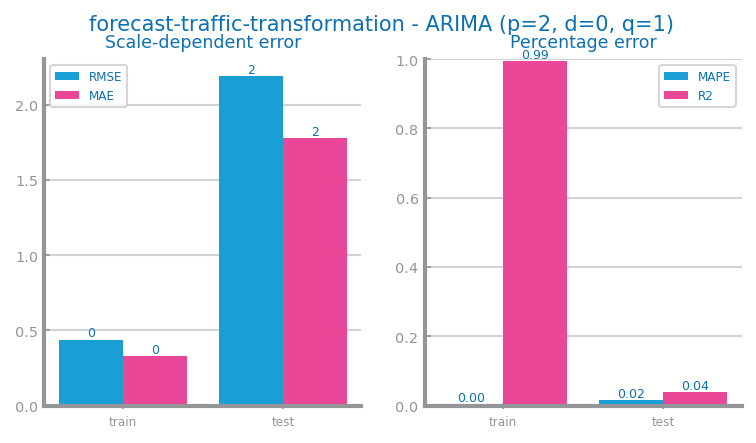

In [29]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
prd_trn = best_model.predict(start=0, end=len(train) - 1)
prd_tst = best_model.forecast(steps=len(test))

plot_forecasting_eval(
    train, test, prd_trn, prd_tst, title=f"{file_tag} - ARIMA (p={params[0]}, d={params[1]}, q={params[2]})"
)
savefig(f"images/forecast/{file_tag}_arima_{measure}_eval.png")

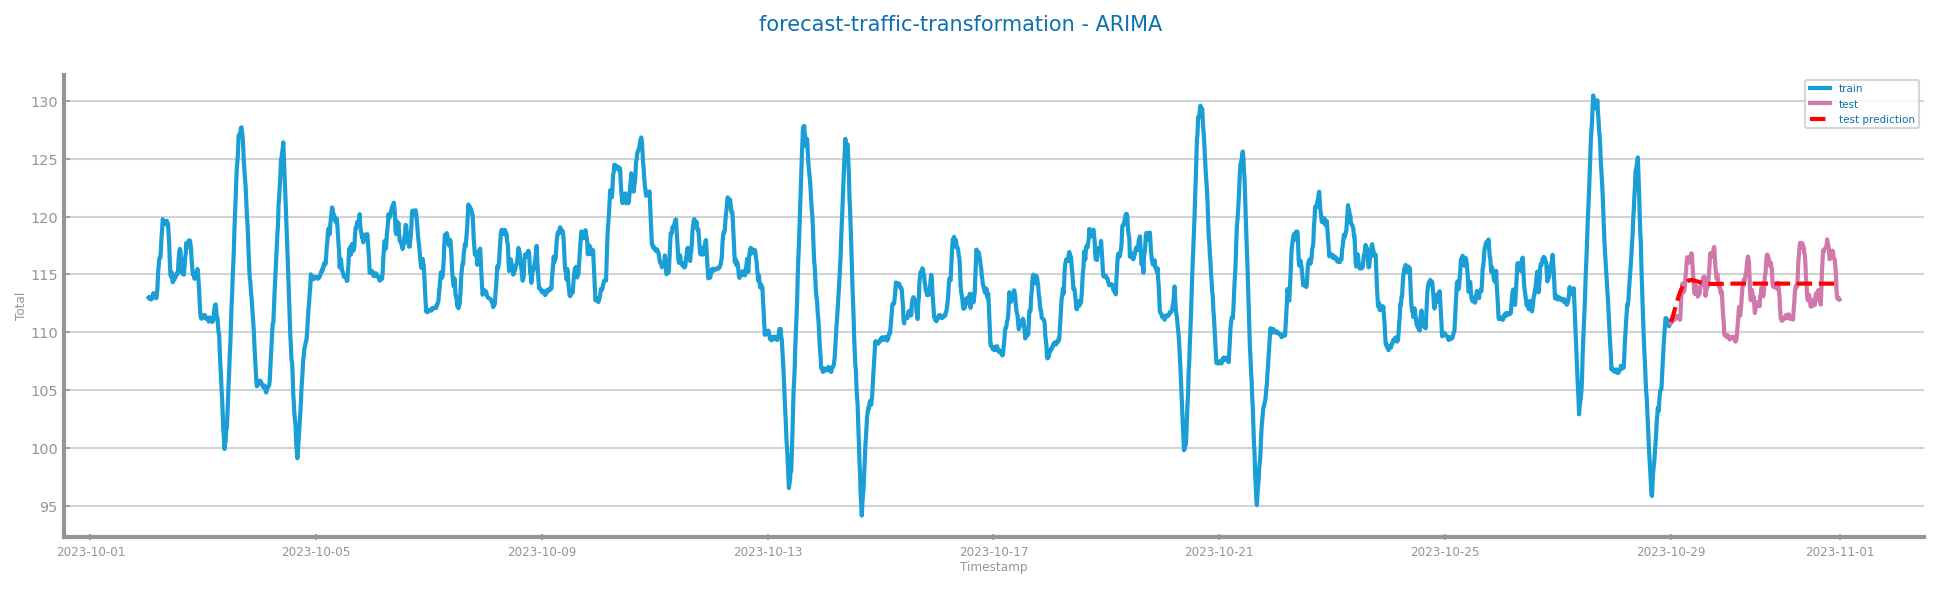

In [30]:
from dslabs_functions import plot_forecasting_series

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - ARIMA ",
    xlabel=index,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_arima_{measure}_forecast.png")

LSTM'S


In [2]:
from torch import no_grad, tensor
from torch.nn import LSTM, Linear, Module, MSELoss
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset


def prepare_dataset_for_lstm(series, seq_length: int = 4):
    setX: list = []
    setY: list = []
    for i in range(len(series) - seq_length):
        past = series[i : i + seq_length]
        future = series[i + 1 : i + seq_length + 1]
        setX.append(past)
        setY.append(future)
    return tensor(setX), tensor(setY)


class DS_LSTM(Module):
    def __init__(self, train, input_size: int = 1, hidden_size: int = 50, num_layers: int = 1, length: int = 4):
        super().__init__()
        self.lstm = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = Linear(hidden_size, 1)
        self.optimizer = Adam(self.parameters())
        self.loss_fn = MSELoss()

        trnX, trnY = prepare_dataset_for_lstm(train, seq_length=length)
        self.loader = DataLoader(TensorDataset(trnX, trnY), shuffle=True, batch_size=len(train) // 10)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

    def fit(self):
        self.train()
        for batchX, batchY in self.loader:
            y_pred = self(batchX)
            loss = self.loss_fn(y_pred, batchY)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return loss

    def predict(self, X):
        with no_grad():
            y_pred = self(X)
        return y_pred[:, -1, :]

ModuleNotFoundError: No module named 'torch'

In [ ]:
from pandas import read_csv, DataFrame, Series
from dslabs_functions import series_train_test_split

measure: str = "R2"

series = data[[target]].values.astype("float32")

train_size = int(len(series) * 0.90)
train, test = series[:train_size], series[train_size:]

In [ ]:
model = DS_LSTM(train, input_size=1, hidden_size=50, num_layers=1)
loss = model.fit()
print(loss)

In [ ]:
from dslabs_functions import HEIGHT, plot_multiline_chart
from copy import deepcopy

from matplotlib.pyplot import figure, savefig, subplots
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart


def lstm_study(train, test, nr_episodes: int = 1000, measure: str = "R2"):
    sequence_size = [2, 4, 8]
    nr_hidden_units = [25, 50, 100]

    step: int = nr_episodes // 10
    episodes = [1] + list(range(0, nr_episodes + 1, step))[1:]
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "LSTM", "metric": measure, "params": ()}
    best_performance: float = -100000

    _, axs = subplots(1, len(sequence_size), figsize=(len(sequence_size) * HEIGHT, HEIGHT))

    for i in range(len(sequence_size)):
        length = sequence_size[i]
        tstX, tstY = prepare_dataset_for_lstm(test, seq_length=length)

        values = {}
        for hidden in nr_hidden_units:
            yvalues = []
            model = DS_LSTM(train, hidden_size=hidden)
            for n in range(0, nr_episodes + 1):
                model.fit()
                if n % step == 0:
                    prd_tst = model.predict(tstX)
                    eval: float = FORECAST_MEASURES[measure](test[length:], prd_tst)
                    print(f"seq length={length} hidden_units={hidden} nr_episodes={n}", eval)
                    if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
                        best_performance: float = eval
                        best_params["params"] = (length, hidden, n)
                        best_model = deepcopy(model)
                    yvalues.append(eval)
            values[hidden] = yvalues
        plot_multiline_chart(
            episodes,
            values,
            ax=axs[i],
            title=f"LSTM seq length={length} ({measure})",
            xlabel="nr episodes",
            ylabel=measure,
            percentage=flag,
        )
    print(
        f"LSTM best results achieved with length={best_params["params"][0]} hidden_units={best_params["params"][1]} and nr_episodes={best_params["params"][2]}) ==> measure={best_performance:.2f}"
    )
    return best_model, best_params


best_model, best_params = lstm_study(train, test, nr_episodes=3000, measure=measure)

In [ ]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
best_length = params[0]
trnX, trnY = prepare_dataset_for_lstm(train, seq_length=best_length)
tstX, tstY = prepare_dataset_for_lstm(test, seq_length=best_length)

prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)

plot_forecasting_eval(
    train[best_length:],
    test[best_length:],
    prd_trn,
    prd_tst,
    title=f"{file_tag} - LSTM (length={best_length}, hidden={params[1]}, epochs={params[2]})",
)
savefig(f"images/forecast/{file_tag}_lstms_{measure}_eval.png")

In [ ]:
from dslabs_functions import plot_forecasting_series

series = data[[target]]
train, test = series[:train_size], series[train_size:]
pred_series: Series = Series(prd_tst.numpy().ravel(), index=test.index[best_length:])

plot_forecasting_series(
    train[best_length:],
    test[best_length:],
    pred_series,
    title=f"{file_tag} - LSTMs ",
    xlabel=index,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_lstms_{measure}_forecast.png")